 <h1><center>Minin for a nice
    Cas9</center></h1>



<div style="text-align: right">Lorenzo federico Signorini, 01/08/2019</div>

<div style="text-align: right">Università degli studi di Trento</div>


In [2]:
# First created Thu Jul 11 09:51:15 CEST 2019
# Made by L-F-S
# At the University Of Trento, Italy

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from IPython.display import display, HTML


sys.path.insert(0, '/home/lorenzo.signorini/cas_mining/utils/')
import filename_discrepancies


dataset="ZellerG_2014" #sys.argv[1] #TODO switch test dataset
tabledir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/3tabellazza" 
CRISPRdir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/1crisprsearch/out"
annodir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/2casanno"
datadir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/"


## last part of step 5:  add SGB info from S4Segata.csv

In [20]:
SGB_table=pd.read_csv("/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/S4Segata.csv", index_col=0)

In [3]:
SGB_table.columns

Index(['SGB ID', '# Reconstructed genomes', '# Reference genomes', 'uSGB',
       'Level of estimated taxonomy', 'Estimated taxonomy',
       'Average distance from closest Reference Genome',
       'Full taxonomic label of the closest genome',
       'Taxonomic assignment based on 16S rRNA sequences (family level)',
       'Taxonomic assignment based on 16S rRNA sequences (genus level)'],
      dtype='object')

In [4]:
SGB_table.head(20)

SGB ID  # Reconstructed genomes  # Reference genomes uSGB  \
0      121                        2                    0  Yes   
1      124                        2                    0  Yes   
2      125                        1                    0  Yes   
3      362                        3                    0  Yes   
4      363                       11                    1   No   
5      364                        1                    0  Yes   
6      372                        7                    0  Yes   
7      376                       23                    0  Yes   
8      378                        1                    0  Yes   
9      380                        9                    0  Yes   
10     381                        4                    0  Yes   
11     382                        1                    0  Yes   
12     384                        1                    0  Yes   
13     385                       16                    2   No   
14     568                        2                    0  Yes   
15     690                        1                    1   No   
16     696                        2                    1   No   
17     697                        1                    0  Yes   
18     698                        9                    2   No   
19     711                        3                    0  Yes   

   Level of estimated taxonomy  \
0                        Other   
1                        Other   
2                        Other   
3                       Family   
4                      Species   
5                        Genus   
6                        Other   
7                       Family   
8                       Family   
9                       Family   
10                      Family   
11                      Family   
12                      Family   
13                     Species   
14                       Other   
15                     Species   
16                     Species   
17                      Family   
18                     Species   
19                      Family   

                                   Estimated taxonomy  \
0                                                   -   
1                                                   -   
2                                                   -   
3   k__Archaea|p__Euryarchaeota|c__Thermoplasmata|...   
4   k__Archaea|p__Euryarchaeota|c__Thermoplasmata|...   
5   k__Archaea|p__Euryarchaeota|c__Thermoplasmata|...   
6                                                   -   
7   k__Archaea|p__Euryarchaeota|c__Thermoplasmata|...   
8   k__Archaea|p__Euryarchaeota|c__Thermoplasmata|...   
9   k__Archaea|p__Euryarchaeota|c__Thermoplasmata|...   
10  k__Archaea|p__Euryarchaeota|c__Thermoplasmata|...   
11  k__Archaea|p__Euryarchaeota|c__Thermoplasmata|...   
12  k__Archaea|p__Euryarchaeota|c__Thermoplasmata|...   
13  k__Archaea|p__Euryarchaeota|c__Methanomicrobia...   
14                                                  -   
15  k__Archaea|p__Euryarchaeota|c__Methanobacteria...   
16  k__Archaea|p__Euryarchaeota|c__Methanobacteria...   
17  k__Archaea|p__Euryarchaeota|c__Methanobacteria...   
18  k__Archaea|p__Euryarchaeota|c__Methanobacteria...   
19  k__Archaea|p__Euryarchaeota|c__Methanobacteria...   

    Average distance from closest Reference Genome  \
0                                         0.362932   
1                                         0.306973   
2                                         0.295981   
3                                         0.213316   
4                                         0.016023   
5                                         0.142728   
6                                         0.292536   
7                                         0.233291   
8                                         0.232543   
9                                         0.230461   
10                                        0.234502   
11                                        0.242205   
12                     

In [22]:
#got to find an unknownness criterion. what is the most unknown possible thing? and wha t is the most known?
unknownness=[]
level_of_estimated_tax=[]
estim_tax=[]
for index, cas9series in cas9dataset.iterrows():
    unknownnes_score="No"
    currentSGB=cas9series["SGB ID"]
    currentSGB_row=SGB_table.loc[SGB_table["SGB ID"]==currentSGB].iloc[0]
    
    unknownnes_score=currentSGB_row.uSGB
    unknownness.append(unknownnes_score)
    
    level_of_estimated_tax.append(currentSGB_row["Level of estimated taxonomy"])
    
    estim_tax.append(currentSGB_row["Estimated taxonomy"])
    
    
cas9dataset["uSGB"]=pd.Series(unknownness, index=cas9dataset.index)
cas9dataset["Level of estimated taxonomy"]=pd.Series(level_of_estimated_tax, index=cas9dataset.index)
cas9dataset["Estimated taxonomy"]=pd.Series(estim_tax, index=cas9dataset.index)

In [188]:
#write file
cas9dataset.to_csv("/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/known_Cas9_variants_table.csv", index_col=0)

In [312]:
SGB_table.sort_values(by="# Reconstructed genomes", ascending=False)

SGB ID  # Reconstructed genomes  # Reference genomes uSGB  \
1490    4933                     3457                    8   No   
361     1836                     2983                   20   No   
672     2318                     2560                    2   No   
438     1934                     2169                   25   No   
1024    4285                     1925                    5   No   
339     1814                     1844                   15   No   
4281   15286                     1813                    0  Yes   
1444    4874                     1809                    4   No   
1181    4540                     1634                   10   No   
1559    5082                     1629                    4   No   
1486    4925                     1587                    3   No   
4305   15316                     1513                    1   No   
1005    4262                     1512                    5   No   
467     1965                     1432                    2   No   
3055   10068                     1413                 6193   No   
4655   17244                     1264                   25   No   
4659   17248                     1245                   59   No   
4294   15300                     1212                    1   No   
2801    9226                     1200                   32   No   
4258   15254                     1188                    0  Yes   
4345   15369                     1152                    2   No   
239     1626                     1146                    3   No   
1068    4348                     1133                    1   No   
1478    4914                     1112                    2   No   
1701    5792                     1074                    1   No   
1554    5075                     1033                    4   No   
453     1949                     1008                    6   No   
1422    4844                     1007                    7   No   
660     2303                      995                    4   No   
317     1790                      945                    5   No   
...      ...                      ...                  ...  ...   
1606    5235                        1                    0  Yes   
3488   14368                        1                    0  Yes   
1607    5236                        1                    0  Yes   
1609    5240                        1                    0  Yes   
3485   14363                        1                    0  Yes   
3484   14361                        1                    1   No   
3482   14353                        1                    0  Yes   
1620    5276                        1                    0  Yes   
1621    5277                        1                    0  Yes   
3477   14347                        1                    0  Yes   
3476   14346                        1                    0  Yes   
3475   14345                        1                    0  Yes   
3474   14344                        1                    0  Yes   
1623    5281                        1                    0  Yes   
1624    5282                        1                    0  Yes   
1626    5284                        1                    0  Yes   
1632    5292                        1                    0  Yes   
3468   14338                        1                    0  Yes   
3467   14337                        1                    0  Yes   
3465   14335                        1                    0  Yes   
1634    5298                        1                    0  Yes   
1635    5299                        1                    0  Yes   
1639    5516                        1                    0  Yes   
1641    5569                        1                    0  Yes   
1643    5678                        1                    0  Yes   
3457   14327                        1                    0  Yes   
3454   14324                        1                    0  Yes   
3453   14323                        1                

In [71]:
cas9dataset.head(10)

Unnamed: 0          Seq ID  \
0           0  EIBEGOMO_01279   
1           1  KBEGFPIJ_01435   
2           2  OBHKLEMF_00864   
3           3  EPJEOPIP_01092   
4           4  AHBHJMAE_01497   
5           5  PPJNGKMK_00620   
6           6  AMIFCEHF_02229   
7           7  HBHGIHPK_01033   
8           8  FBOIKEJM_00490   
9           9  BNAIOCPL_01158   

                                     Seq Description  \
0  EIBEGOMO_01279 CRISPR-associated endonuclease ...   
1  KBEGFPIJ_01435 CRISPR-associated endonuclease ...   
2  OBHKLEMF_00864 CRISPR-associated endonuclease ...   
3  EPJEOPIP_01092 CRISPR-associated endonuclease ...   
4  AHBHJMAE_01497 CRISPR-associated endonuclease ...   
5  PPJNGKMK_00620 CRISPR-associated endonuclease ...   
6  AMIFCEHF_02229 CRISPR-associated endonuclease ...   
7  HBHGIHPK_01033 CRISPR-associated endonuclease ...   
8  FBOIKEJM_00490 CRISPR-associated endonuclease ...   
9  BNAIOCPL_01158 CRISPR-associated endonuclease ...   

                                                 Seq  \
0  MAEEIITDITIFGESKKMLRETLRKKFASCLDDEAIKKLSKLRYRD...   
1  MKNIVGLDLGTNSIGWAVVNGSVNDDGSEQLVKIQASGSRIIPMDA...   
2  MTKLNQPYGIGLDIGSNSIGFAVVDANSHLLRLKGETAIGARLFRE...   
3  MGDRKYNLGLDIGTSSIGFAAVDENNQPIRVKGKTAIGVRLFEEGK...   
4  MGYILGLDIGVASVGYAIIDENYNVLISGVRLFREGTAEENVARRG...   
5  MGKTHIIGVGLDLGGTYTGTFITSHPSDEAEHRDHSSAFTVVNSEK...   
6  MKTILGLDLGTTSIGWALVKEAEPFSDEKSEIVRLGVRVIPLTVDE...   
7  MKSIYEDLKKEKMVISMAKELHFTSKDMPISDFDRMELKGRIETNP...   
8  MILSTQKYIIDTKGCNMKYKLGLDLGSTSLGWAIVELNEKDTPIRL...   
9  MDKKYYIGADIGTESVGWAVTDEDYNILKARGRELWGSYLFDKAES...   

                              Contig                           Genome Name  \
0  NODE_1073_length_1994_cov_2.17225   AsnicarF_2017__MV_FEI4_t1Q14__bin.1   
1   NODE_45_length_75974_cov_38.2495   AsnicarF_2017__MV_FEI4_t1Q14__bin.4   
2   NODE_51_length_94666_cov_13.1517   AsnicarF_2017__MV_FEI4_t2Q15__bin.2   
3   NODE_70_length_82951_cov_19.4828   AsnicarF_2017__MV_FEI4_t2Q15__bin.5   
4  NODE_123_length_29049_cov_29.8501  AsnicarF_2017__MV_FEI5_t1Q14__bin.12   
5  NODE_30_length_116148_cov_68.0265   AsnicarF_2017__MV_FEI5_t2Q14__bin.2   
6  NODE_175_length_31817_cov_9.16545   AsnicarF_2017__MV_FEM1_t1Q14__bin.6   
7  NODE_4986_length_3564_cov_6.73668   AsnicarF_2017__MV_FEM2_t1Q14__bin.2   
8   NODE_9_length_125774_cov_10.3523  AsnicarF_2017__MV_FEM2_t1Q14__bin.30   
9  NODE_2411_length_6235_cov_4.42071  AsnicarF_2017__MV_FEM2_t1Q14__bin.32   

           Study    Sample Name  SGB ID                   pilercr_CRISPR  \
0  AsnicarF_2017  MV_FEI4_t1Q14    6939                              NaN   
1  AsnicarF_2017  MV_FEI4_t1Q14    1814  [('ID=CRISPR1', '40172', '12')]   
2  AsnicarF_2017  MV_FEI4_t2Q15    7144  [('ID=CRISPR1', '23272', '22')]   
3  AsnicarF_2017  MV_FEI4_t2Q15    7168   [('ID=CRISPR1', '24497', '3')]   
4  AsnicarF_2017  MV_FEI5_t1Q14    6939  [('ID=CRISPR1', '13059', '23')]   
5  AsnicarF_2017  MV_FEI5_t2Q14    9262   [('ID=CRISPR1', '29853', '6')]   
6  AsnicarF_2017  MV_FEM1_t1Q14    2230  [('ID=CRISPR2', '25256', '18')]   
7  AsnicarF_2017  MV_FEM2_t1Q14    1024                              NaN   
8  AsnicarF_2017  MV_FEM2_t1Q14   17322  [('ID=CRISPR1', '113006', '6')]   
9  AsnicarF_2017  MV_FEM2_t1Q14   14099                              NaN   

                                       minced_CRISPR  \
0                                                NaN   
1                          [('.', '39283', '40172')]   
2                          [('.', '21587', '23272')]   
3                          [('.', '24197', '25552')]   
4                          [('.', '11506', '13060')]   
5  [('.', '29462', '29925'), ('.', '36897', '3764...   
6                          [('.', '23902', '25256')]   
7                                                NaN   
8                        [('.', '112378', '113006')]   
9                                                NaN   

                                          prokka_cas  unknownnes_score uSGB  \
0            

# Shortest working cas9 from most unknown genome

questo prevede che tu abbia completato lo step 5 e abbia una seconda table di cas

# 1. Plot cas9 lengths

In [3]:
cas9dataset=pd.read_csv("/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/known_Cas9_variants_table.csv", index_col=0)

In [104]:
cas9dataset.columns
cas9dataset.head(5)

Unnamed: 0.1          Seq ID  \
0             0  EIBEGOMO_01279   
1             1  KBEGFPIJ_01435   
2             2  OBHKLEMF_00864   
3             3  EPJEOPIP_01092   
4             4  AHBHJMAE_01497   

                                     Seq Description  \
0  EIBEGOMO_01279 CRISPR-associated endonuclease ...   
1  KBEGFPIJ_01435 CRISPR-associated endonuclease ...   
2  OBHKLEMF_00864 CRISPR-associated endonuclease ...   
3  EPJEOPIP_01092 CRISPR-associated endonuclease ...   
4  AHBHJMAE_01497 CRISPR-associated endonuclease ...   

                                                 Seq  \
0  MAEEIITDITIFGESKKMLRETLRKKFASCLDDEAIKKLSKLRYRD...   
1  MKNIVGLDLGTNSIGWAVVNGSVNDDGSEQLVKIQASGSRIIPMDA...   
2  MTKLNQPYGIGLDIGSNSIGFAVVDANSHLLRLKGETAIGARLFRE...   
3  MGDRKYNLGLDIGTSSIGFAAVDENNQPIRVKGKTAIGVRLFEEGK...   
4  MGYILGLDIGVASVGYAIIDENYNVLISGVRLFREGTAEENVARRG...   

                              Contig                           Genome Name  \
0  NODE_1073_length_1994_cov_2.17225   AsnicarF_2017__MV_FEI4_t1Q14__bin.1   
1   NODE_45_length_75974_cov_38.2495   AsnicarF_2017__MV_FEI4_t1Q14__bin.4   
2   NODE_51_length_94666_cov_13.1517   AsnicarF_2017__MV_FEI4_t2Q15__bin.2   
3   NODE_70_length_82951_cov_19.4828   AsnicarF_2017__MV_FEI4_t2Q15__bin.5   
4  NODE_123_length_29049_cov_29.8501  AsnicarF_2017__MV_FEI5_t1Q14__bin.12   

           Study    Sample Name  SGB ID                   pilercr_CRISPR  \
0  AsnicarF_2017  MV_FEI4_t1Q14    6939                              NaN   
1  AsnicarF_2017  MV_FEI4_t1Q14    1814  [('ID=CRISPR1', '40172', '12')]   
2  AsnicarF_2017  MV_FEI4_t2Q15    7144  [('ID=CRISPR1', '23272', '22')]   
3  AsnicarF_2017  MV_FEI4_t2Q15    7168   [('ID=CRISPR1', '24497', '3')]   
4  AsnicarF_2017  MV_FEI5_t1Q14    6939  [('ID=CRISPR1', '13059', '23')]   

               minced_CRISPR                                prokka_cas1  \
0                        NaN                                        NaN   
1  [('.', '39283', '40172')]  [('ID=KBEGFPIJ_01437', '37910', '38842')]   
2  [('.', '21587', '23272')]  [('ID=OBHKLEMF_00863', '24253', '25158')]   
3  [('.', '24197', '25552')]  [('ID=EPJEOPIP_01091', '26532', '27437')]   
4  [('.', '11506', '13060')]    [('ID=AHBHJMAE_01496', '7315', '8232')]   

                                 prokka_cas2 uSGB Level of estimated taxonomy  \
0                                        NaN   No                     Species   
1  [('ID=KBEGFPIJ_01438', '38842', '39180')]   No                     Species   
2  [('ID=OBHKLEMF_00862', '23970', '24275')]   No                     Species   
3  [('ID=EPJEOPIP_01090', '26249', '26554')]   No                     Species   
4    [('ID=AHBHJMAE_01495', '6974', '7318')]   No                     Species   

                                  Estimated taxonomy  
0  k__Bacteria|p__Firmicutes|c__Negativicutes|o__...  
1  k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...  
2  k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...  
3  k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...  
4  k__Bacteria|p__Firmicutes|c__Negativicutes|o__...

## All Cas9s

In [189]:
counts=cas9dataset["Seq"].str.count("")

In [190]:
counts.max()

1784

In [60]:
summedcounts=counts.value_counts(ascending=False)

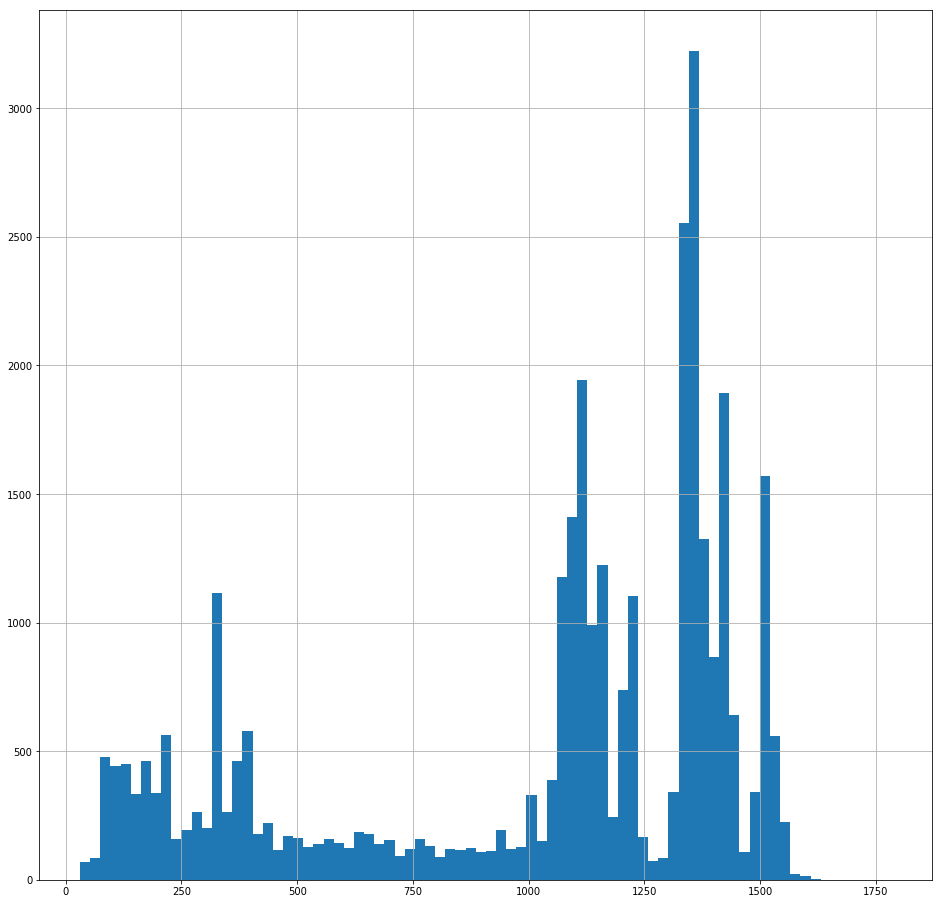

In [167]:
counts.hist(bins=80, figsize=(20*0.8,20*0.8))

## Filter by: active locus
An active locus is defined by having at least 1 CRISPR array, 1 Cas1, 1 Cas2, and 1 effector Cas

In [17]:
# just checking that the next step actually works, so, there should ONLY BE NANs in the cas and crispr columns. it is so. daje
temp=cas9dataset[cas9dataset.isna().any(axis=1)]
temp[temp["Estimated taxonomy"]==None]   

Empty DataFrame
Columns: [Unnamed: 0.1, Seq ID, Seq Description, Seq, Contig, Genome Name, Study, Sample Name, SGB ID, pilercr_CRISPR, minced_CRISPR, prokka_cas1, prokka_cas2, uSGB, Level of estimated taxonomy, Estimated taxonomy]
Index: []

In [4]:
activecas9s=cas9dataset.dropna(how="any")

In [8]:
print(activecas9s.shape,
cas9dataset.shape)

(18875, 17) (33978, 17)


In [6]:
activecas9counts=activecas9s["Seq"].str.count("")

([<matplotlib.axis.XTick at 0x7f2f0c66e470>,
 <a list of 34 Text xticklabel objects>)

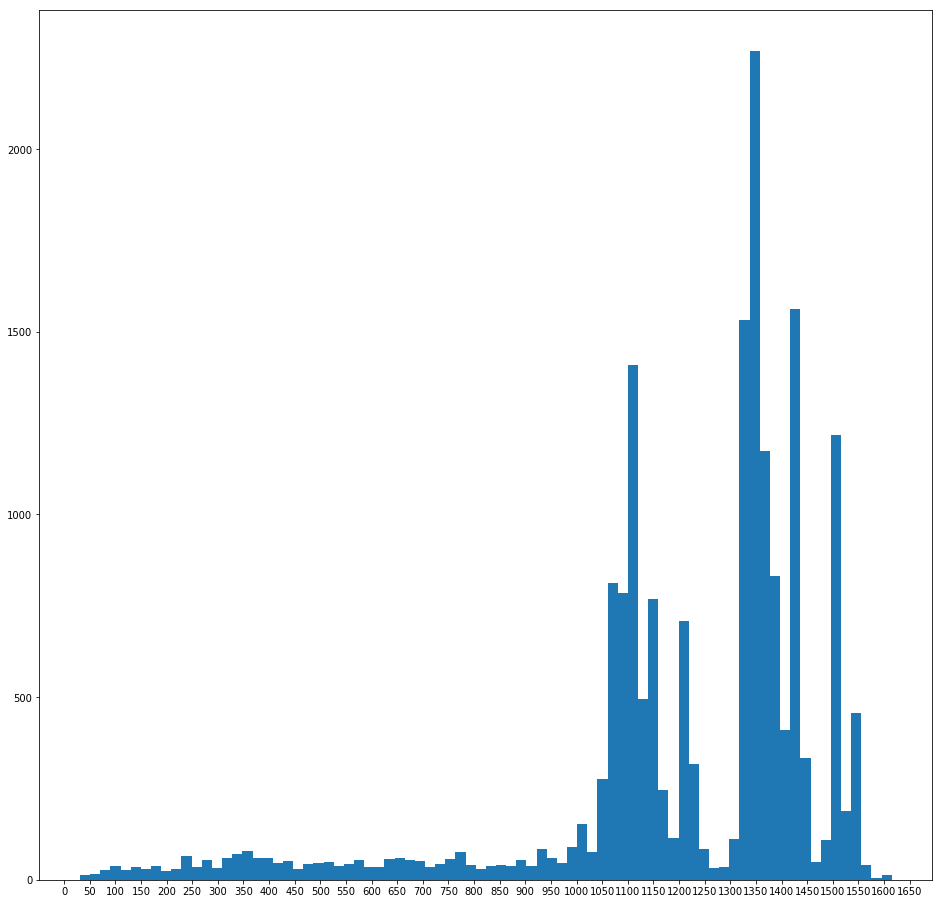

In [10]:
plt.figure(figsize=(20*0.8,20*0.8))
plt.hist(activecas9counts ,bins=80)
plt.xticks(np.arange(0, 1700, step=50))


The length intreval where there seems to be a working protein is around (1050,1170) , (1330,1450) and maybe (1500,1580). We shall define these intrevals as being "working" lengths

## Filter by: shortest (in active locus)

In [7]:
sorted_activecas9=activecas9counts.sort_values()

In [291]:
print(sorted_activecas9)

28094      31
26246      37
21426      42
17094      43
11983      43
21904      44
9594       44
21918      44
33936      47
26335      47
11076      48
22916      50
26846      50
11951      51
17078      51
15585      52
13538      52
15376      55
20617      55
15385      55
16958      59
16985      59
18714      59
15029      59
19069      61
27285      61
20149      67
3394       67
7560       70
2662       71
         ... 
30045    1565
13409    1565
6260     1566
23686    1566
23795    1567
23824    1567
30230    1568
4199     1568
32219    1568
14489    1568
18310    1569
23771    1574
24137    1574
14858    1590
17858    1590
17851    1590
3865     1592
13103    1600
2249     1602
4152     1602
3924     1602
3912     1602
2347     1602
3779     1602
15261    1603
2328     1605
1581     1605
33102    1611
5716     1615
31690    1615
Name: Seq, Length: 18875, dtype: int64


In [199]:
shortest=activecas9s.loc[28094]
print(shortest)

Unnamed: 0                                                                 28094
Seq ID                                                            BMONKFGJ_01472
Seq Description                BMONKFGJ_01472 CRISPR-associated endonuclease ...
Seq                                               MGKEYYLGLDIGTDSVGWAVCDTNYKIPKF
Contig                                        NODE_1412_length_15011_cov_4.50181
Genome Name                                   YuJ_2015__SZAXPI015220-136__bin.58
Study                                                                   YuJ_2015
Sample Name                                                     SZAXPI015220-136
SGB ID                                                                      4327
pilercr_CRISPR                                    [('ID=CRISPR1', '8833', '10')]
minced_CRISPR                                            [('.', '8204', '8833')]
prokka_cas1                             [('ID=BMONKFGJ_01470', '9882', '10763')]
prokka_cas2                 

In [200]:
print(shortest.Seq)

MGKEYYLGLDIGTDSVGWAVCDTNYKIPKF


## Filter by: shortest in active locus at working length intreval

In [108]:
working_intreval=sorted_activecas9[sorted_activecas9>=1049]
working_intreval=working_intreval[working_intreval<=1099]

In [295]:
working_intreval

24037    1049
2311     1049
20773    1049
7552     1049
18560    1049
18837    1049
14517    1049
10860    1049
31421    1049
25137    1049
30022    1049
24531    1049
15249    1049
3715     1050
31732    1050
21182    1050
28031    1050
29330    1051
8072     1051
30979    1051
18846    1051
18320    1051
24563    1051
18836    1051
18488    1051
18022    1051
14055    1051
19460    1051
18801    1051
20891    1051
         ... 
1518     1078
6980     1078
14534    1078
1296     1078
22489    1078
30792    1078
23225    1078
2824     1078
29804    1078
10251    1078
5937     1078
4823     1078
4836     1078
6790     1078
4846     1078
12712    1078
29558    1078
33577    1078
32206    1078
32258    1078
18347    1078
8411     1078
31253    1078
618      1078
6700     1078
33833    1078
12688    1078
5579     1078
5580     1078
22614    1078
Name: Seq, Length: 992, dtype: int64

In [297]:
for index, working_sequence in working_intreval.iteritems():
    print (activecas9s.loc[index])
    print(activecas9s.loc[index].Seq)



Unnamed: 0                                                                 24037
Seq ID                                                            AJPPFNPG_01426
Seq Description                AJPPFNPG_01426 CRISPR-associated endonuclease ...
Seq                            MERKYGIGLDIGIGSVGYAVISRTNNLDARIEDIGVRLFDSGENIR...
Contig                                         NODE_968_length_21697_cov_7.90555
Genome Name                        VogtmannE_2016__MMRS24340226ST-27-0-0__bin.16
Study                                                             VogtmannE_2016
Sample Name                                                MMRS24340226ST-27-0-0
SGB ID                                                                      5785
pilercr_CRISPR                                     [('ID=CRISPR1', '5119', '6')]
minced_CRISPR                                            [('.', '4620', '5184')]
prokka_cas1                              [('ID=AJPPFNPG_01427', '3379', '4275')]
prokka_cas2                 

Name: 25977, dtype: object
MEKEKNNHVWGFDIGKGSLGEAVRIGGDFKHIASVLLDPEFGEIKTAALARRQMRTRKAHKAREKWLEECLEGTGVEILKRREVGIVDGQWQLISKGDERLEREFPPSGEDVCYNSIALRCKLLLGEKLEGWQVFKALNSAIQKRGYDENIPWGEAEEKSSKKDDDDYAQKLSQYEKEKSELFESFADGEKYDFPCFFKAYKMGLWSPENPTRVEVRIDCRAQKAKSYVIARKYVEREFECLVEAAAKFFPKLKGRAKFILYGVSETPYASYYGNMRKKFGLKRGAESDWTALGQKVPRFDNRIIDKCRLIPRMNVCKIRPLNEARNEKDLLYYEVTLALKLLNLRFFRNSNIEQLTFEEFKKAFEIAAGAKYKMTKTAMKKFLKSISATALGDDYAEIEPPKESGRASFSRPAMEILKELIFSGMPPREFYGRKISEISNTDKNKGVVSSDLDFIKLMGDCPWGGIFIPDVQTYQFANVAFPDPDAQINKLIGSQNNPIVRHRLTFFFERIKFLESKYGVPDKVVLEFVRDDFMGEKEKKEMRIAMKKRAEEKMRIAKDLDEHGFKGGNLLLKMELYRKQNGICLYTGDALPLSELATLEIEHIVPRSRGGPDAQYNYVITREKTNKLKGDKTPYEWLSSDAKEWASYTDRVNACAKALGKKRCRLLLEKDAEELVEKYTALAETAHIAKLAQKIVCMHFGFQFGGLSGTKRVFTVPGALTSRIRKFYGLDRILHNSASESENLSFEEFLKFSEDLEKKNRKNKKHHALDAMCLCFAPTGVDSRRAKLGEILPEKLRSEKAAREFFKSYLDKIMPVDVAPKKPRLEDGIYSKRIIGGKACMVKRNNLVDLAYKSGLKPVFDIPTLIKLVDKKEKGIINPQIRKMIGEFAATNPDESAWRKWCEEVRLPSKSGLGARVMRVLVYYGEADEYKDLSKDGCGAYRKGDGHKGQVIWESVDGKYYVEPVYVHASKA

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETAGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREVGSVGHMVGRCRFEPEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAIVCEKNDVGIERFLSEKGISEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKVGYDFREDGIKLAEKKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAADWLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYKEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFTDAPQPYEYVDGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYISSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINALVK

MEKRNNGLVLGLDIGVTSVGYGIVNRETGEAVDFGVRLFSEWDPANNQNRRAKRSGRRLRSRRKNRLQDMKKFLVDQGMIPSDYGFCLDPHSLRVKGLSEKLTDEELATVLYNLAKLRGSSLETVEDTDDTKSDDPLSSKNNLRINDTLIKSGKYVCQIQQERLSEEGKLRGHINNFRTKDYVAELKQILSNQGKSKDFNDYVENLIIRRRDFSDGPGSQQSPTPYGRWLTKDQEEPIDLIEKMRGKCSYYPDQLRCAKMAYKADLFNLLNDLNNLSVKGEKLEREQKEQVIEYVNEKGSIKPKQLAKLLGFSDIDDISGFRIDKSDKPILTEFKGYTKVKKVLENSGLYQDHELVDQIIDILTRDKVVERRANEIRKLSNKFSEDEVDALANLTQISGYHSMSAKAINEFNKEMLISPLNQMQIITNRGNQNDRFNKLKGMKEIHADDTVILSPVAKRAQREAMKVVNRLRELYGEFDSIVVETTRAKNSQEQKTKIKESQAFFEKEKKRAQQIVDENKYNLTVNAKLIQKLRLYAEQNCKTAYALKPIDLDLLISDPTAFEVDHIIPISISYDDSFSNKVLVTRWENQIKGNLTPLQAHKNHKFGEYSDLASYIANVNDLRKMNGMRYEKKKNLLLSDEDLTKFDTQKKFIARNIVDTAYAERVVLNTLQDYFRANEISTVVNTVKGNLTHMFRNKIHLDKERSDIDTGDAHHAIDALIIASLKVFRRFGEILDKQPETIIDDETGEVLEIIEDKKFFDPRYIEIVHKLSLIEKDVTKFSYKIDTKPNRQVADETIYSTRNINGEDLVVKKYKNIYEEKFVTLANDILENNVEKYLMYRNSPETFKYISDIILHYAKEYRDDEKLMKNGLFVKNPLNRYYEEHHEYLHKPSKYNNGPAIISMKYTDGRLGNKIDISKNYSVDTEKKKVVLQQISAYRTDFYYSSTEGYKFVTVRYSSVYYSSAQGLYVIDKDWYESQKKVKKIDDSFEFCFSMHRNEI

Name: 22522, dtype: object
MKHPYGIGLDIGIASVGWAVVALNENAEPYGLIRCGSRIFDKAEQPKTGDSLAAPRREARSARRRLRRRSLRKADLYELMEKNGLPGKAEIEQAVQAGHLPDVYALRVQALDGPVTALDFARILLHLMQRRGFRSNRKADDAQKDGKLLQAIDANTRRMEANRYRTVGEMMYRDPVFAEHKRNKAENYLSTVKRDQIIDEARLVFAAQRQYGATWASPEMEAEYLCILTRQRSFAEGPGKGSPYSGTNRVGTCTLEGKSEQRAAKAAFSFEYFTLLQKINHIRIAENGTSRTLTPAERQVLLSVCSQTDKLDFARVRKALALPEEARFNMVRYRGGQTAEACEKKEKITALPCYHKMRKALNTLRKDHIRNISREQLDAAGAALTNPENEDKLREALKQAEFEPLEIEALLTLPGFAGYGHISVKACRKLIPYLEQGMNYNDACQAAGYDFQGRQNGEKAQFLPASTEEMEDITSPVVRRAVAQTIKVVNAIIREQGESPVSIHLELAREMNKNFQQRSELDKAMRDNSAENERLMKELNELFPGRTVTGQDLVKYRLWKEQNEICAYSLEKLDLTRVITEPGYAEVDHIVPYSISFDDRRTNKVLVLASENRQKGNRLPLQYLQGKRRDDFIVYTKANVKNFRKRQNLLKERLSEEDGKGYIQRNLQDTQYIAAFMLNYIRNHLAFADCSGAGKRRAVAVNGAVTAFLRKRWGLSKVRADGDLHHAADAAVIACTTQGMIKRVSDFCKRAETTVVRNEHFPEPWPHFRDELTQRLSACPQEDLMKINPVYYATVDISSIQPVFVSRMPRHKVTGAAHKETIKSRLDDTHVVQRRNITELKLDKDGEIAGYFNRSSDTLLYNALKARLLAFGGDGKKAFAEPFYKPRADGTPGARVQKVKICDKVTSTVPVHGGKGVADNDTMVRMDVYFVPGDGYYWVPIYVADTVKLKLPNKAVVQGKSYAEWKEMDEENF

MENKKVFGFDMGANSIGWCVQIIGEDGFTLEILGMGSRIFENSRDPKTRVPLSVERRMAHAMSVRRGRQIMRTRNLCSILRKYGLLPSGENVSVSERNPYKLRAKAVSEKVDMFGIGRAILHMNKRRGFKSNRKADKKSDGAESRGMKLGISKLREAMGDRTLGEFLYERKKSDMGTRMRADAIRGKNEYEIYADRGMYESELRRIWDCQRKYHRNLTDEMLNEISGALFFQRPLKSPERGFCRFEPGERRAYKAYPVSQKFRILQEVNALEILDIAGNGEGITLSMRQKLARALLENDRKIVNKKGIATFAKIKKFLGIPQSLNFNFESESRKGFDGDSTAAVMGSAECFGDAWADMDDCLREKIVDLILADKEGEFAALCAEKFGFGAEKSCAILDAGGELKDGTVSLSAKAMRKILPHLEGGALYHAACAEAGYDFTADYDGERSDLLPYYGKILRTSVLGGNPNFDPEKQPEKYYGKINNPTVHVALNQLRKVYNKLVAVYGRPDMVAVETARELPLGAKGLGELLSEQGKNRGKNLEIAEELKKFGAANNYRNRMKYKLWEDLNPDCIKRACPFCGRPIELQKLFTPEFEIEHLLPFSETFDDTRANKVVSCASCNRILKGNRSPYDAFANRAGYDWNGILSRVSDMPKSKQWRFRPDAWEIFEEKYGDYIARMLNDTRYMSKLAREYLTSVIEPEKILTVTGSATSMLRAKWGLDAILDDSSPLQFGGESESSAAKAPKAPVKNREDHRHHAIDAFVISSLNRKLISAISQCAKRAEQAHLENLFKAIPRAYERISYEKLEAAVKSINVSHKLDRGDAKGALKRGGTVAKLHKETAYGMIGSPYGGKATLAKRVPILSVECDEGQISEIANAKIRADLSRFCEQVYREAATKEEKKSMWARLLGEYCTSNKIRRVRIHLPNRELKKLIPISDKKGKVYKYMENAESYCIDIYKPRNSEKWKFEVINMFAAHKNEMPQWRKDDSRAKLVMRLFKR

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [109]:
active_working_cas9s=activecas9s.loc[working_intreval.index]

## Filter by: most unknnown shortest working Cas9 in active locus

In [110]:
active_working_unknwon_cas9s=active_working_cas9s[active_working_cas9s.uSGB=="Yes"]
active_working_unknwon_cas9s

Unnamed: 0.1          Seq ID  \
2311           2311  CFBAINMD_01653   
7552           7552  OIJAMLGP_00354   
31421         31421  MAENDEJL_00713   
31732         31732  FEBDAHJJ_01807   
21182         21182  BMHFPHPC_01075   
12509         12509  AFONCILI_01170   
31404         31404  JFPLLJPB_01404   
17495         17495  NFIPCFGE_00754   
6657           6657  IKHHFLLB_00607   
4454           4454  KHLCDIBH_00816   
20136         20136  OOJEBMMB_01188   
11160         11160  AMNGDNGI_00741   
8204           8204  GCFAHDKL_00751   
9015           9015  KMOPKFAL_00150   
9058           9058  AFMOEGLJ_00488   
9050           9050  CEDMFLDN_00344   
8190           8190  OCJCDBFH_00837   
25543         25543  KDHCHMOC_01163   
2767           2767  PKIJGCPB_00100   
27286         27286  MECEONJN_00201   
32125         32125  NDDMKELA_01552   
24235         24235  IAGNPDAB_00263   
8534           8534  BLMIHOLK_01780   
217             217  PLPEDNFF_00681   
8733           8733  GIMLBOLE_01236   
8499           8499  FIGJCFKH_00691   
8551           8551  MOMPONEG_00617   
8347           8347  EOGLCDAE_00098   
10235         10235  OKFJFKHD_00764   
8188           8188  MOJMHPFF_00662   
...             ...             ...   
20526         20526  KGADJCEJ_00677   
8879           8879  EFBBGHGE_00314   
20614         20614  EMNELIHL_00078   
14642         14642  DLPJIEMN_00536   
25703         25703  LICOEJAO_01104   
26952         26952  HELHHGGO_00551   
21088         21088  KPOOIKJO_00084   
32511         32511  NHOLJJPE_01207   
19402         19402  BKMPLIJC_00714   
32066         32066  HCPBLKMN_01021   
32592         32592  KMNDOAOC_01364   
13221         13221  JHMIBEJA_01817   
3014           3014  OPMEJHMD_01051   
334             334  HPMJMKAB_01025   
19748         19748  BNGKDGAE_01056   
9690           9690  HJBLCOIJ_00255   
27395         27395  NGMGEPED_01092   
8885           8885  LFAKLNBF_00442   
19197         19197  OPCLFCOE_00979   
27474         27474  DHOCILBG_00668   
22924         22924  MCHLAEOB_00212   
26519         26519  GJFKPBJF_01723   
3395           3395  HDMPKLNM_00303   
16500         16500  KIPNGPIL_01248   
29512         29512  NNAJLGLO_01586   
32827         32827  GPGANCKE_00740   
2572           2572  MDMEKBOE_01160   
29215         29215  OEDCCDLG_00475   
33649         33649  CPJOMLEM_00040   
31113         31113  GPANFLFE_00196   

                                         Seq Description  \
2311   CFBAINMD_01653 CRISPR-associated endonuclease ...   
7552   OIJAMLGP_00354 CRISPR-associated endonuclease ...   
31421  MAENDEJL_00713 CRISPR-associated endonuclease ...   
31732  FEBDAHJJ_01807 CRISPR-associated endonuclease ...   
21182  BMHFPHPC_01075 CRISPR-associated endonuclease ...   
12509  AFONCILI_01170 CRISPR-associated endonuclease ...   
31404  JFPLLJPB_01404 CRISPR-associated endonuclease ...   
17495  NFIPCFGE_00754 CRISPR-associated endonuclease ...   
6657   IKHHFLLB_00607 CRISPR-associated endonuclease ...   
4454   KHLCDIBH_00816 CRISPR-associated endonuclease ...   
20136  OOJEBMMB_01188 CRISPR-associated endonuclease ...   
11160  AMNGDNGI_00741 CRISPR-associated endonuclease ...   
8204   GCFAHDKL_00751 CRISPR-associated endonuclease ...   
9015   KMOPKFAL_00150 CRISPR-associated endonuclease ...   
9058   AFMOEGLJ_00488 CRISPR-associated endonuclease ...   
9050   CEDMFLDN_00344 CRISPR-associated endonuclease ...   
8190   OCJCDBFH_00837 CRISPR-associated endonuclease ...   
25543  KDHCHMOC_01163 CRISPR-associated endonuclease ...   
2767   PKIJGCPB_00100 CRISPR-associated endonuclease ...   
27286  MECEONJN_00201 CRISPR-associated endonuclease ...   
32125  NDDMKELA_01552 CRISPR-associated endonuclease ...   
24235  IAGNPDAB_00263 CRISPR-associated endonuclease ...   
8534   BLMIHOLK_01780 CRISPR-associated endonuclease ...   
217    PLPEDNFF_00681 CRISPR-associated endonuclease ...   
8733   GIMLBOLE_01236 CRISPR-associated endonuclease ...   
8499   FIGJCFKH_00691 CRISPR

In [111]:
active_working_unknwon_cas9s.shape

(436, 16)

## Sort by abundance of SGBs

In [301]:
active_working_unknwon_cas9s.groupby(["SGB ID"]).count().sort_values(by="Seq ID", ascending=False)

Unnamed: 0  Seq ID  Seq Description  Seq  Contig  Genome Name  Study  \
SGB ID                                                                         
9340            86      86               86   86      86           86     86   
15299           50      50               50   50      50           50     50   
8767            33      33               33   33      33           33     33   
15095           22      22               22   22      22           22     22   
8769            19      19               19   19      19           19     19   
9710            17      17               17   17      17           17     17   
9311            15      15               15   15      15           15     15   
9307             9       9                9    9       9            9      9   
4329             9       9                9    9       9            9      9   
8774             9       9                9    9       9            9      9   
15286            7       7                7    7       7            7      7   
6833             7       7                7    7       7            7      7   
15196            6       6                6    6       6            6      6   
8768             6       6                6    6       6            6      6   
15108            5       5                5    5       5            5      5   
5752             5       5                5    5       5            5      5   
6970             5       5                5    5       5            5      5   
6927             4       4                4    4       4            4      4   
6796             4       4                4    4       4            4      4   
15194            4       4                4    4       4            4      4   
6503             4       4                4    4       4            4      4   
19692            4       4                4    4       4            4      4   
6499             4       4                4    4       4            4      4   
15177            3       3                3    3       3            3      3   
8780             3       3                3    3       3            3      3   
6829             3       3                3    3       3            3      3   
9306             3       3                3    3       3            3      3   
9359             3       3                3    3       3            3      3   
9675             3       3                3    3       3            3      3   
5853             3       3                3    3       3            3      3   
...            ...     ...              ...  ...     ...          ...    ...   
15223            1       1                1    1       1            1      1   
15107            1       1                1    1       1            1      1   
15295            1       1                1    1       1            1      1   
1001             1       1                1    1       1            1      1   
9458             1       1                1    1       1            1      1   
9335             1       1                1    1       1            1      1   
1586             1       1                1    1       1            1      1   
3922             1       1                1    1       1            1      1   
3957             1       1                1    1       1            1      1   
3968             1       1                1    1       1            1      1   
4304             1       1                1    1       1            1      1   
4331             1       1                1    1       1            1      1   
4335             1       1                1    1       1            1      1   
4964             1       1                1    1       1            1      1   
5116             1       1                1    1       1            1      1   
5760             1       1                1    1       1            1      1   
5768             1       1                1    1       1            1      1   
5805    

In [309]:
for SGB in [9340, 15299, 8767, 15095, 8769, 9710, 9311, 9307, 4329, 8774, 15286]:
    print("++++++++++++++++++++++++++++++++:\n",SGB_table.loc[SGB_table["SGB ID"]==SGB].iloc[0]["Level of estimated taxonomy"], SGB_table.loc[SGB_table["SGB ID"]==SGB].iloc[0]["Estimated taxonomy"])

++++++++++++++++++++++++++++++++:
 Family k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodospirillales|f__Rhodospirillaceae
++++++++++++++++++++++++++++++++:
 Genus k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Gemmiger
++++++++++++++++++++++++++++++++:
 Other -
++++++++++++++++++++++++++++++++:
 Family k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_unclassified
++++++++++++++++++++++++++++++++:
 Other -
++++++++++++++++++++++++++++++++:
 Genus k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pasteurellales|f__Pasteurellaceae|g__Haemophilus
++++++++++++++++++++++++++++++++:
 Family k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodospirillales|f__Acetobacteraceae
++++++++++++++++++++++++++++++++:
 Family k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodospirillales|f__Acetobacteraceae
++++++++++++++++++++++++++++++++:
 Genus k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Eub

In [208]:
chosen_SGB=SGB_table.loc[SGB_table["SGB ID"]==9340].iloc[0]
chosen_SGB

SGB ID                                                                                                          9340
# Reconstructed genomes                                                                                          242
# Reference genomes                                                                                                0
uSGB                                                                                                             Yes
Level of estimated taxonomy                                                                                   Family
Estimated taxonomy                                                 k__Bacteria|p__Proteobacteria|c__Alphaproteoba...
Average distance from closest Reference Genome                                                              0.245108
Full taxonomic label of the closest genome                         k__Bacteria|p__Proteobacteria|c__Alphaproteoba...
Taxonomic assignment based on 16S rRNA sequences (family level) 

In [209]:
chosen_SGB["Estimated taxonomy"]

'k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodospirillales|f__Rhodospirillaceae'

In [210]:
prv=active_working_unknwon_cas9s[active_working_unknwon_cas9s["SGB ID"]==9340]
for index, cas9 in prv.iterrows():
   # print("--------------------------------------------------------\nSequennce:\n",cas9.Seq)
    print("length:", len(cas9.Seq))


length: 1059
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068
length: 1068

In [211]:
prv=active_working_unknwon_cas9s[active_working_unknwon_cas9s["SGB ID"]==9340]
for index, cas9 in prv.iterrows():
    print("--------------------------------------------------------\nSequennce:\n",cas9.Seq)



--------------------------------------------------------
Sequennce:
 MGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREVGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTMVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYQQQNGKCIYSGNAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIG

In [216]:
sequences=prv.iloc[1:]  #take first one out
sequences.shape

(85, 16)

# Extract identical sequences

In [347]:
from itertools import groupby
fastafile=outpath+faa_filename
records = list(SeqIO.parse(fastafile,'fasta'))

In [367]:
def seq_getter(s): return str(s.seq)

records.sort(key=seq_getter)
print(len(records))
n=0
for seq,equal in groupby(records, seq_getter):
    ids = ','.join(s.id for s in equal)
    N=ids.count(',')+1
    print('>%s' % ids)
    print(N)

85
>PBBBNHNG_01718
1
>KHCPJOPA_00874
1
>LKIKBDJD_00893,DFHAEIGC_00604
2
>NOCHMELD_01109
1
>BBFBJBDM_00372,ACDIGMDJ_00574,BNBKEBPA_00984,OILHPHOL_00236
4
>AIMPHGCP_01060,CFFAMIGJ_00282
2
>MOIBJMGO_00807
1
>CBOBIHJA_01779
1
>AGIJFODC_00514,EOFDAFGE_01126,EJMCJGIE_00775
3
>EGFLNDIK_00864,JHPKMFGA_00310
2
>MMKNGLEG_01191,AGABGMOC_01328,NEJAADAB_01396,JEJBKHGL_00986,CMNDKFNE_00402
5
>JPFFHEHC_00061,PLIDADCJ_01302,MJHMFCCG_00078,JLONOJOD_00157,FKBNNEBE_00794,DKJOBDEF_01329,LMIJBPMI_01383,FOMAMPLE_01631,MPCNCGBI_00749,MKOFONMB_01161,JACEMIBO_00737,HABLOHPP_00913,GCDLPLKH_00540,BJDEMEEE_01710
14
>LEEFMLPH_00508
1
>JIALGAEP_01281
1
>BINNHNOE_00947,JFOLEOEP_00758
2
>GMHNACIM_00519,EPBEKCKH_01440
2
>DLBODGFO_01479,LJBOJPMF_00324,NKAEJOBD_01649
3
>OCELCMFD_00538,PGIBIKKF_00883,OJIFKKEH_00952,DCBFKDAH_01299,JCLLJKEO_01173,NBMJNKHO_01298,FIMCNEOK_00718,JKODOPGL_01579
8
>EAGINNHM_01142,CLIBJPAB_00323,DEIDNKHI_01181,AILELFNF_01096,BKMCBIIO_00662,LCDHAJHK_00866,EOHPEAHO_00046,HJEHAEKM_01241,NHGEAHNA_01

# Build consensus sequence for these 86 sequences

In [234]:
outpath="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/output_consensus_sequences/"

### ClustalW alignment:

In [218]:
from Bio.Alphabet import generic_dna, generic_protein
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import AlignIO
from Bio.Align.Applications import ClustalwCommandline
from Bio.Align import AlignInfo

In [233]:

alignments=[]
for index, row in sequences.iterrows():
#    print("\n+\n",cas9.Seq, cas9["Seq ID"])
    tempseq=SeqRecord(Seq(row.Seq), id=row["Seq ID"], description=row["Seq Description"]+" from GENOME: "+row["Genome Name"]+"from SGB: "+ str(row["SGB ID"]))
    alignments.append(tempseq)

filename="SGB9340"
SeqIO.write(alignments, outpath+filename+".faa", "fasta")


85

In [235]:

cline= ClustalwCommandline("clustalw", infile=outpath+filename+".faa", outfile=outpath+filename+".faa.aln")
print(cline)


clustalw -infile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/output_consensus_sequences/SGB9340.faa -outfile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/output_consensus_sequences/SGB9340.faa.faa.aln


In [236]:
os.system(str(cline))

0

In [331]:
align = AlignIO.read(outpath+filename+".faa.aln", "clustal")
print(align)

SingleLetterAlphabet() alignment with 85 rows and 1068 columns
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE EAGINNHM_01142
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE CLIBJPAB_00323
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE DEIDNKHI_01181
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE AILELFNF_01096
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE BKMCBIIO_00662
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE LCDHAJHK_00866
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE EOHPEAHO_00046
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE HJEHAEKM_01241
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE NHGEAHNA_01672
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE CPAKIPPI_01087
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE CLJAIPHE_01376
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE ECOAOMCO_01177
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE CDCIOEHC_00563
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGV...KGE COFAJMHN_00806
MKKKIFGFDLGIA

### Build consensus for SGB9340 Cas9

In [340]:
summary_align = AlignInfo.SummaryInfo(align)
CONSENSUS_SEQUENCE=SeqRecord(summary_align.dumb_consensus(0.5), id="PROVA", description="bo Consensus sequence")
consfilename=outpath + filename+"_consensus.faa" #ffn
SeqIO.write(CONSENSUS_SEQUENCE, consfilename, "fasta")

In [321]:
for record in SeqIO.parse(consfilename, "fasta"):
    con=record.seq
    print(record.seq)

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINALVK

In [242]:
len(con)

1068

In [322]:
from Bio import pairwise2
#for record in SeqIO.parse("/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/spyrcas9.txt", "fasta"):
 #   Cas9=SeqRecord(record.seq, id=record.id, description=record.description)
  #  break
Cas9="MDKKYSIGLDIGTNSVGWAVITDEYKVPSKKFKVLGNTDRHSIKKNLIGALLFDSGETAEATRLKRTARRRYTRRKNRICYLQEIFSNEMAKVDDSFFHRLEESFLVEEDKKHERHPIFGNIVDEVAYHEKYPTIYHLRKKLVDSTDKADLRLIYLALAHMIKFRGHFLIEGDLNPDNSDVDKLFIQLVQTYNQLFEENPINASGVDAKAILSARLSKSRRLENLIAQLPGEKKNGLFGNLIALSLGLTPNFKSNFDLAEDAKLQLSKDTYDDDLDNLLAQIGDQYADLFLAAKNLSDAILLSDILRVNTEITKAPLSASMIKRYDEHHQDLTLLKALVRQQLPEKYKEIFFDQSKNGYAGYIDGGASQEEFYKFIKPILEKMDGTEELLVKLNREDLLRKQRTFDNGSIPHQIHLGELHAILRRQEDFYPFLKDNREKIEKILTFRIPYYVGPLARGNSRFAWMTRKSEETITPWNFEEVVDKGASAQSFIERMTNFDKNLPNEKVLPKHSLLYEYFTVYNELTKVKYVTEGMRKPAFLSGEQKKAIVDLLFKTNRKVTVKQLKEDYFKKIECFDSVEISGVEDRFNASLGTYHDLLKIIKDKDFLDNEENEDILEDIVLTLTLFEDREMIEERLKTYAHLFDDKVMKQLKRRRYTGWGRLSRKLINGIRDKQSGKTILDFLKSDGFANRNFMQLIHDDSLTFKEDIQKAQVSGQGDSLHEHIANLAGSPAIKKGILQTVKVVDELVKVMGRHKPENIVIEMARENQTTQKGQKNSRERMKRIEEGIKELGSQILKEHPVENTQLQNEKLYLYYLQNGRDMYVDQELDINRLSDYDVDHIVPQSFLKDDSIDNKVLTRSDKNRGKSDNVPSEEVVKKMKNYWRQLLNAKLITQRKFDNLTKAERGGLSELDKAGFIKRQLVETRQITKHVAQILDSRMNTKYDENDKLIREVKVITLKSKLVSDFRKDFQFYKVREINNYHHAHDAYLNAVVGTALIKKYPKLESEFVYGDYKVYDVRKMIAKSEQEIGKATAKYFFYSNIMNFFKTEITLANGEIRKRPLIETNGETGEIVWDKGRDFATVRKVLSMPQVNIVKKTEVQTGGFSKESILPKRNSDKLIARKKDWDPKKYGGFDSPTVAYSVLVVAKVEKGKSKKLKSVKELLGITIMERSSFEKNPIDFLEAKGYKEVKKDLIIKLPKYSLFELENGRKRMLASAGELQKGNELALPSKYVNFLYLASHYEKLKGSPEDNEQKQLFVEQHKHYLDEIIEQISEFSKRVILADANLDKVLSAYNKHRDKPIREQAENIIHLFTLTNLGAPAAFKYFDTTIDRKRYTSTKEVLDATLIHQSITGLYETRIDLSQLGGD"

alignments = pairwise2.align.globalxx(con, Cas9)

In [323]:
print(pairwise2.format_alignment(*alignments[0]))

MK-KK--IFGFDLG-IA---SI-GWAVIDHSDENFDPETGEII-EG-KVVGCGVRCFP-----VAE--NPK-DGS--S----L--A--------APRREK--RLLR-RIT-RRKAR--RMLGI-K-R---L---FV----AKGLVA--STTE----LEA---LYA-EQTG-----------G---D-VWNLRA--EA-------LRRP--L--S--KEEL--LRVLTH--LAK--H----RG-FK----------SYR---KAA-------------EE----ADKESGR-----ILT-A-----------IA----ENRKETV--G-FQT--LAQMIVERA---------KHS--D---DH-KMRNYTP-Q--KGP--------NKGV--AV-----YV--------N-S--IP------RE---EIEKETK--L----IFE--Y----Q-----K----QFG-LFT-EDL-YRDFCK-IAFR-------YREAGSV---GHMVGRCRFE-SEQPRA--------P---K----EAPSAELFVALS-KIN-N---L--KV--TV-D-G---------E-----RR---F---L--NGEER-KALL-E--L----------LK---N------T-K-E----------V--KY--ST----I-------KN----K-LF-KGR-----EVF-FDD-VNYAQK---TK-K----G--K----SGEE-K-A-VNPEDAK--FYAMKGWH---K-----LKAAFSPEQW---K--E----VG--S------N--LP-----LL----D---LGMTAVVC--EK-N-DAGIERFLSEKG-IP-------EDYREV------------F--K--K-L-----TG----SEF---INL------SL-KA--LYK--L------NPY-----LAEG-----L--KYNQACE---KA---GY--DFR---EDG-IK--LAEEKGLLLP-PIAND-K---LT-TVP-VV

In [245]:
474/1368

0.34649122807017546

In [338]:
for tempseq in align:
  #  print(tempseq.seq)
    alignments = pairwise2.align.globalxx(con, tempseq.seq)
    print(pairwise2.format_alignment(*alignments[0]))

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREA-GSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTT-VPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFI-DAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREA-GSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTT-VPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFI-DAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREA-GSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTT-VPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFI-DAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREA-GSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTT-VPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFI-DAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREA-GSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTT-VPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFI-DAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREA-GSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTT-VPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFI-DAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREA-GSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTT-VPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFI-DAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTT-VPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFI-DAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINAL

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINAL

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINAL

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERN-QIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINA

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQ-NGKCIYSGK-AIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMIN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREA-GSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQ-NGKCIYSGK-AIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINA

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQ-NGKCIYSGK-AIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINA

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQ-EKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINAL

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQ-EKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNFMINAL

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREA-GSVGHMVGRCRFES-EQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQ-EKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDC-KEFIDAPQPYEYVN-GSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPI-FRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNN

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTP-QKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFES-EQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAV-VCEKNDA-GIERFLSEKGIP-EDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKA-GYDFREDGIKLAEEK-GLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAE-DG-LEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIK-NRI-QVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEV-WYKYI-KQQIREPWSGFRTEVLAS-LEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFI-DAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNE

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAV-VCEKNDA-GIERFLSEKGIP-EDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKA-GYDFREDGIKLAEEK-GLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENET-ERKEAE-DG-LEKEGLAANG-KNMLKYRLYRQQ-NGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQ-TPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVN-GSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPI-FRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKK

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTT-VPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVINGLKNNF

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFES-EQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEE-RKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKE-VGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQ-NGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQ-TPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQ-EKENDLEFRERNANDNSYIARYVKRYLEDAV-DFSASSCAIK-NRI-QVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEV-WYKYI-KQQIREPWSGFRTEVLAS-LEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKK

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFES-EQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEE-RKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKE-VGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQ-NGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQ-TPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQ-EKENDLEFRERNANDNSYIARYVKRYLEDAV-DFSASSCAIK-NRI-QVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEV-WYKYI-KQQIREPWSGFRTEVLAS-LEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKK

MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETV-GFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKG-REVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQ-NGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAV-DFSASSCAIK-NRI-QVRTGSLTDYLRHQWGLIKDRNE--SDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEK-LGHEE-AEV-WYKYI-KQQIREPWSGFRTEVLAS-LEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVD-CKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVVI

#cycle for all 10:

In [315]:
for SGB in [9340, 15299, 8767, 15095, 8769, 9710, 9311, 9307, 4329, 8774, 15286]:
    current_SGB=active_working_unknwon_cas9s[active_working_unknwon_cas9s["SGB ID"]==SGB]
    print("+\nSGB: ",SGB,"\n", current_SGB.iloc[1].Seq)

+
SGB:  9340 
 MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREVGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTMVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRDASDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEELGHEKAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVNCKEFTDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQEYIGKIGKFDNEKKQVV

In [114]:
cons_table_1049_1099=""
    
def seq_getter(s): return str(s.seq)

print("SeqID\t# identical sequences\tsequence length")
for SGB in [9340, 15299, 8767, 15095, 8769, 9710, 9311, 9307, 4329, 8774, 15286]:
    print("+\nSGB: "+str(SGB))
    current_SGB=active_working_unknwon_cas9s[active_working_unknwon_cas9s["SGB ID"]==SGB]
    alignments=[]
    for index, row in current_SGB.iterrows():
    #    print("\n+\n",cas9.Seq, cas9["Seq ID"])
        tempseq=SeqRecord(Seq(row.Seq), id=row["Seq ID"], description=row["Seq Description"]+" from GENOME: "+row["Genome Name"]+"from SGB: "+ str(row["SGB ID"]))
      #  print(tempseq)
        alignments.append(tempseq)

    filename="SGB"+str(SGB)
    SeqIO.write(alignments, outpath+filename+".faa", "fasta")
    
    fastafile=outpath+filename+".faa"
    records = list(SeqIO.parse(fastafile,'fasta'))    



    records.sort(key=seq_getter)
    print(len(records))
    n=0
    for seq,equal in groupby(records, seq_getter):
        ids = ','.join(s.id for s in equal)
        N=ids.count(',')+1
        headerline=">SGB:"+str(SGB)+"_"+str(N)
        print(">SGB:"+str(SGB),"\t",N,"\t",len(seq))
        line=">SGB: "+str(SGB)+"\tIDs: "+ids+"\t#sequences: "+str(N)+"\tlength: "+str(len(seq))+"\n"+seq+"\n"
        cons_table_1049_1099+=line
    
    
    #cline= ClustalwCommandline("clustalw", infile=outpath+filename+".faa", outfile=outpath+filename+".faa.aln")
    #print(cline)
    ##if not SGB==9340:  #TMP, xke già lanciatpo su 9340
    #os.system(str(cline))
    #align = AlignIO.read(outpath+filename+".faa.aln", "clustal")
    #print(align)
    #summary_align = AlignInfo.SummaryInfo(align)
    #CONSENSUS_SEQUENCE=SeqRecord(summary_align.dumb_consensus(0.5), id="PROVA", description="bo Consensus sequence")
    #consfilename=outpath + filename+"_consensus.faa" #ffn
    #SeqIO.write(CONSENSUS_SEQUENCE, consfilename, "fasta")
    #for record in SeqIO.parse(consfilename, "fasta"):
    #    con=record.seq


SeqID	# identical sequences	sequence length
+
SGB: 9340
86
>SGB:9340 	 1 	 1059
>SGB:9340 	 1 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 2 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 4 	 1068
>SGB:9340 	 2 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 3 	 1068
>SGB:9340 	 2 	 1068
>SGB:9340 	 5 	 1068
>SGB:9340 	 14 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 2 	 1068
>SGB:9340 	 2 	 1068
>SGB:9340 	 3 	 1068
>SGB:9340 	 8 	 1068
>SGB:9340 	 20 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 6 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 1 	 1068
>SGB:9340 	 1 	 1068
+
SGB: 15299
50
>SGB:15299 	 1 	 1077
>SGB:15299 	 1 	 1074
>SGB:15299 	 1 	 1077
>SGB:15299 	 1 	 1077
>SGB:15299 	 1 	 1074
>SGB:15299 	 2 	 1077
>SGB:15299 	 2 	 1074
>SGB:15299 	 2 	 1074
>SGB:15299 	 1 	 1077
>SGB:15299 	 3 	 1077
>SGB:15299 	 1 	 1077
>SGB:15299 	 1 	 1077
>SGB:15299 	 2 	 1077
>SGB:15299 	 1 	 1077
>SGB:15299 	 1 	 1077
>SGB:15299 	 1 	 1077
>SGB:15299 	 1 	 1077
>SG

In [113]:
print(cons_table_1049_1099)

>SGB: 9340	IDs: FGNIMOCH_00190	# sequences:1	length: 1059
MGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREVGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTMVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYQQQNGKCIYSGNAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIK

In [327]:

for SGB in [9340, 15299, 8767, 15095, 8769, 9710, 9311, 9307, 4329, 8774, 15286]:
    filename="SGB"+str(SGB)
    consfilename=outpath + filename+"_consensus.faa"
    for record in SeqIO.parse(consfilename, "fasta"):
        con=record.seq

    headerline=">SGB: "+str(SGB)+"CONSENSUS SEQUENCE:\n"
    print(headerline,con)
    print("length", len(con))
    line=headerline+con
    cons_table+=line+"\n"
    

>SGB: 9340CONSENSUS SEQUENCE:
 MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETVGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGLFTEDLYRDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKGREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYRQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYQEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNESDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGSAHKDTIFSKSEKKGSLPIRYGMAEKENMFRLDVFRKENHFYIVPIYVVDLVDCKEFIDAPQPYEYVNGSFIKIDESFNFMFSLYKDDYVEITSKDECIKGYVNQYNAQSGQLYIGSVDNSPIFRIKTSTFLRDDNILLKIGDQE

# Do the same, for sequences between 950 and 1049 aa long:

## Filter by: shortest in active locus at working length intreval

In [95]:
working_intreval=sorted_activecas9[sorted_activecas9>=949]
working_intreval=working_intreval[working_intreval<=1048]

In [59]:
working_intreval

16952     949
4189      949
6779      949
23107     949
16226     949
1987      950
1870      950
11090     950
3665      950
20729     950
187       951
6033      953
15738     954
27836     954
170       954
30239     955
2608      955
20488     955
14743     956
8868      956
11853     956
3453      956
10161     956
14383     957
22743     957
30818     957
17068     958
6273      958
25340     958
19338     959
         ... 
25442    1044
12830    1044
3501     1044
16310    1044
17553    1045
20173    1045
23219    1045
10836    1046
27906    1046
24737    1046
2537     1046
14539    1047
966      1047
15823    1047
23476    1047
17854    1047
25790    1047
19220    1048
19212    1048
19209    1048
19207    1048
19213    1048
19232    1048
23973    1048
19230    1048
24121    1048
19215    1048
19218    1048
27173    1048
17125    1048
Name: Seq, Length: 449, dtype: int64

In [14]:
for index, working_sequence in working_intreval.iteritems():
    print (activecas9s.loc[index])
    print(activecas9s.loc[index].Seq)



Unnamed: 0                                                                 16952
Unnamed: 0.1                                                               16952
Seq ID                                                            DLBGEIGE_00654
Seq Description                DLBGEIGE_00654 CRISPR-associated endonuclease ...
Seq                            MFDEIENKTFMPKQVTKSNGVVPMQVNEEELKAILDNAKDYLPFLN...
Contig                                          NODE_124_length_43845_cov_8.8829
Genome Name                                         LouisS_2016__AS63_24__bin.35
Study                                                                LouisS_2016
Sample Name                                                              AS63_24
SGB ID                                                                      4348
pilercr_CRISPR                                   [('ID=CRISPR1', '38953', '14')]
minced_CRISPR                                          [('.', '37996', '38953')]
prokka_cas1                 

Name: 637, dtype: object
MDVTRPYLVLGLDPGIASCGFCLLDMTNHKILEMGSHLFKAPQEDKTKTSLAVTRRKARSIRRNTARTAARLKRCLELLAGAGLVPADADKTWLQTKKGDKPILKLRAGGLDRLLTDREFAQVLYSLCGRRGYIPHGEGRLGETDEDESKKVLGAIKKNQDAMAAGSYRTVGEMLNAQGRSRNRGGDYSLCVYNSQIQDEAKVLFASQRAHGNTKATRELEDSYLACLTWEKKSLDHDARVYELVGPCSYFPGEKRAASADISSELCRAYERLGHIVIVHEDGSEQALTASEIDDHLKILFSTAPIKGNKECKVTYGTIRKDLDISGKSVFKGIAQDREKDEPFAPKAWRSLRRVLPEGLLARMFADRKLGDAVCEALTFASSEASLIERLSDLGLSDDERDAILAVPFTGKLFKGYGSRSLKALGLLLGAFEEPEIRILTDAEKVTGLLDLRLSDRGVRGQLLPPYDSYDPTCRNPVVLRAMGRMRHIVNAIIRIHGVPDEIHIELGRDLKMSNKEKSLVDKRNRENAASNKKWATTAAGILGCTPEEVPGRIIRKLILREEQGEKDLYTGDSIDLEHLVRDDRYCEIDHILPYSRTCDDSRANKVLVLSKSNQDKRERTPYEWMTSGEAGAPSWDSYRARVMAQVKNPRKRANHLNTDLGPETQAKFLARNLNDDRYMSVAVKNYLEDCLLFPEDGRKRHVTAVAGGATGNLRWVWGLNFGEGNVKDRADDRHHAVDAAIIAACSESTVKKVAEASAKGREAFKQLRKSRLADTQPWPTFAAEVAARREFVVPTRMADHGVTGRAFQDFSYRLEGLRETGYAEISRQTDPATRERRSDAAGNYALSSNGTVKLLDAIAFVRFWHDPDAGKNGKWYAEPVYCADIPAIQNGSYVPKYQKQKVARNSWLPVPDSAMHNEPLVLFQGDVLIIDSHIGRFWTYAIGGGTLNILSLLDKNEKAECFPPISKWVNSVEV

MKYILGLDIGIASVGFAVVEQDDNREFTGISDAGVRVFRAAEQPKTGASLALPRREKRGSRRRLQRRVSRLYRLKQLFVQNGIITEQNIEELYIGGKKTIDVWNLRKDALERKLTGEEFYRCLMHIAKRRGFKSIRKSEEAKNSGALLKAIEENSVKFNQGKYRTIGEMYATLYADDIPKRNKRDSYKNSIPRNLLYDEVGIIFENQRKLGFDKATTELEDAYKNIAFYQRPLSSFEDKIGNCIFEKNEKRAPKYSYSAELFTAATRIVNTTIVDEMGNSRFFKESEILKLKDLAHINSKVTYAQAKKCLNLSQTDRFNSLNYNKKDKKTGELINPETSVFVELKGYHAIRKVIEKNLGKEYFNSIQYDKDLFNKIAFVLTCEKSDENIVKKMEELNIPNEIIRCVQDLSMSKVIHLSIKAIEKILPFMLTGMKYNEACFEAGYNHSVLNASKNKCCLLPVLQPNEMTTNPVVNRAISQTRKVINTLIKKYGAFDTIIVEMARDLSKSVNERREIEKAQEEFQAQKELARKRCIENGIDPDVPKSNLLKFRLWEEQNGYCMYSGKYIPPSKLKEPNSVQIDHIIPFSKSFDDSLNNKVLCLTDENQRKGNKIPYEHIGESNWHEFVNRIKMYNLKTAKVNRLTRKSYPKEDEAFKSRNLNDTRYMAKFIKDYIKENLDFDNNLKVETRNGAITAFLRTNWGLVKNRQKNDKHHAQDAVIIACTTQKMVQKISATAAQIEKNEYVNNKKPKYKKPWETFNEDIEKTISNIFVSRAIRAKISGEIHEETIRSAKHLAEGYTTLKTPIKKINLSILENMFDKERNIKIYEILKERLLEFDNDPKKAFEIPIYMPLSEEKVKLGQRPHEIKSIKIKDNGISGIKVNNGFASNSSIARLDVFKKENKKGKNEYFFVPVYVSDFGNDLPNKIFPVTKTSGNIDETYEFCFSLYQDCLISVNMSGNKSDEKYWYYRGFDISTGTITVDSNDREIEKQRISVKKAALI

In [96]:
active_working_cas9s=activecas9s.loc[working_intreval.index]

## Filter by: most unknnown shortest working Cas9 in active locus

In [97]:
active_working_unknwon_cas9s=active_working_cas9s[active_working_cas9s.uSGB=="Yes"]
active_working_unknwon_cas9s

Unnamed: 0  Unnamed: 0.1          Seq ID  \
1870         1870          1870  NKGLJMBJ_00036   
11090       11090         11090  KJDMGLGH_01090   
170           170           170  JJNJAONG_00079   
2608         2608          2608  PNKCOBEG_00068   
6273         6273          6273  GCEOGADH_01212   
25340       25340         25340  MOJKMKJH_00496   
17077       17077         17077  HFHGEGGB_01281   
11952       11952         11952  OJFAPCEG_01446   
15936       15936         15936  POLOOKHD_01143   
15926       15926         15926  FKPPKKCJ_01237   
7044         7044          7044  KLFNJAPB_00964   
8847         8847          8847  PFHCJBLB_01142   
2193         2193          2193  MAODHDOJ_00572   
2991         2991          2991  EPKEDIHH_00313   
24034       24034         24034  BJLFGDLJ_00371   
29617       29617         29617  BKFMNBEO_00897   
445           445           445  IKJIGBEK_01643   
9654         9654          9654  HJNMIALP_01313   
25444       25444         25444  BOAKNKFL_00674   
26299       26299         26299  JEIMODDH_00382   
6411         6411          6411  EONGBINP_01013   
5169         5169          5169  OJLECMNO_01146   
19055       19055         19055  AOPFDEBE_00006   
3916         3916          3916  ANDNFIEL_00616   
3802         3802          3802  KJEAEPOF_00117   
2351         2351          2351  FLJLKKHA_00012   
19025       19025         19025  OCAPEKPH_00528   
16498       16498         16498  FHFPLBAP_01086   
17454       17454         17454  ALLAAMGB_00212   
9043         9043          9043  ILJNNFNE_00607   
...           ...           ...             ...   
2323         2323          2323  OJBCFGLG_00687   
3042         3042          3042  LGPMHMPC_01126   
2459         2459          2459  FFLDILOM_00495   
2950         2950          2950  EFJGIDLB_00905   
32294       32294         32294  JMAADKHK_00564   
29881       29881         29881  KJBIHCLK_00967   
30996       30996         30996  MMFJCBJB_01399   
30968       30968         30968  FBDDNBEO_00645   
14307       14307         14307  APOOOFIG_00455   
29708       29708         29708  MPLONJOH_02252   
3127         3127          3127  ICCPMBAN_00992   
2541         2541          2541  CDNEFKHP_00332   
18985       18985         18985  MAGIBKHP_00905   
8611         8611          8611  KMGKDBFE_00449   
3897         3897          3897  PCKINHCF_00609   
15317       15317         15317  PHHFECDO_00321   
1409         1409          1409  FEBLFEFJ_00726   
9779         9779          9779  JKKLFGFO_00831   
25442       25442         25442  LDKIAEDK_00176   
16310       16310         16310  CGGBOHDB_01617   
20173       20173         20173  IEKKFMNM_00050   
10836       10836         10836  NODIDDBK_01474   
27906       27906         27906  JFHLJJCJ_00980   
24737       24737         24737  EJFMMKGJ_01309   
2537         2537          2537  IDPOGLNI_00591   
15823       15823         15823  MPCADJMN_00368   
17854       17854         17854  JJHDIPAB_00686   
25790       25790         25790  GHBOGJLN_00820   
24121       24121         24121  MJEENJCG_00961   
27173       27173         27173  BHCGMJMN_00194   

                                         Seq Description  \
1870   NKGLJMBJ_00036 CRISPR-associated endonuclease ...   
11090  KJDMGLGH_01090 CRISPR-associated endonuclease ...   
170    JJNJAONG_00079 CRISPR-associated endonuclease ...   
2608   PNKCOBEG_00068 CRISPR-associated endonuclease ...   
6273   GCEOGADH_01212 CRISPR-associated endonuclease ...   
25340  MOJKMKJH_00496 CRISPR-associated endonuclease ...   
17077  HFHGEGGB_01281 CRISPR-associated endonuclease ...   
11952  OJFAPCEG_01446 CRISPR-associated endonuclease ...   
15936  POLOOKHD_01143 CRISPR-associated endonuclease ...   
15926  FKPPKKCJ_01237 CRISPR-associated endonuclease ...   
7044   KLFNJAPB_00964 CRISPR-associated endonuclease ...   
8847   PFHCJBLB_01142 CRISPR-associated endonuclease ...   
2193   MAODHDOJ_00572 CRISPR-associated endonuclease ...   
2991

In [61]:
active_working_unknwon_cas9s.shape

(192, 17)

## Sort by abundance of SGBs

In [19]:
active_working_unknwon_cas9s.groupby(["SGB ID"]).count().sort_values(by="Seq ID", ascending=False)

Unnamed: 0.1  Seq ID  Seq Description  Seq  Contig  Genome Name  \
SGB ID                                                                    
9340             105     105              105  105     105          105   
15299             51      51               51   51      51           51   
8767              34      34               34   34      34           34   
15095             22      22               22   22      22           22   
8769              21      21               21   21      21           21   
9710              17      17               17   17      17           17   
9281              17      17               17   17      17           17   
9311              16      16               16   16      16           16   
14454             11      11               11   11      11           11   
9280              10      10               10   10      10           10   
15286             10      10               10   10      10           10   
8774              10      10               10   10      10           10   
14370              9       9                9    9       9            9   
9307               9       9                9    9       9            9   
4329               9       9                9    9       9            9   
15196              7       7                7    7       7            7   
6833               7       7                7    7       7            7   
6796               6       6                6    6       6            6   
9324               6       6                6    6       6            6   
8768               6       6                6    6       6            6   
6970               5       5                5    5       5            5   
19692              5       5                5    5       5            5   
17319              5       5                5    5       5            5   
9243               5       5                5    5       5            5   
5752               5       5                5    5       5            5   
15108              5       5                5    5       5            5   
6499               4       4                4    4       4            4   
6927               4       4                4    4       4            4   
6503               4       4                4    4       4            4   
15194              4       4                4    4       4            4   
...              ...     ...              ...  ...     ...          ...   
1586               1       1                1    1       1            1   
1567               1       1                1    1       1            1   
1536               1       1                1    1       1            1   
5805               1       1                1    1       1            1   
6289               1       1                1    1       1            1   
9458               1       1                1    1       1            1   
8775               1       1                1    1       1            1   
9343               1       1                1    1       1            1   
9338               1       1                1    1       1            1   
9335               1       1                1    1       1            1   
9323               1       1                1    1       1            1   
9321               1       1                1    1       1            1   
9315               1       1                1    1       1            1   
9313               1       1                1    1       1            1   
9274               1       1                1    1       1            1   
9242               1       1                1    1       1            1   
1472               1       1                1    1       1            1   
8673               1       1                1    1       1            1   
6361               1       1                1    1       1            1   
8656               1       1                1    1       1            1   
8646               1       1     

Again, SGB 9340 is the most abundant!

In [18]:
for SGB in [9340, 9281, 14454, 9280, 14370, 9243, 9324, 17319]:
    print("++++++++++++++++++++++++++++++++:\n",SGB_table.loc[SGB_table["SGB ID"]==SGB].iloc[0]["Level of estimated taxonomy"], SGB_table.loc[SGB_table["SGB ID"]==SGB].iloc[0]["Estimated taxonomy"])

++++++++++++++++++++++++++++++++:
 Family k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodospirillales|f__Rhodospirillaceae
++++++++++++++++++++++++++++++++:
 Family k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Sutterellaceae
++++++++++++++++++++++++++++++++:
 Genus k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella
++++++++++++++++++++++++++++++++:
 Family k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Sutterellaceae
++++++++++++++++++++++++++++++++:
 Family k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae
++++++++++++++++++++++++++++++++:
 Other -
++++++++++++++++++++++++++++++++:
 Other -
++++++++++++++++++++++++++++++++:
 Other -


# Extract identical sequences

In [14]:
from itertools import groupby
from Bio.SeqRecord import SeqRecord
#from Bio.Alphabet import generic_dna, generic_protein
from Bio.Seq import Seq
#from Bio import AlignIO
from Bio.Align import AlignInfo
def seq_getter(s): return str(s.seq)

outpath="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/output_consensus_sequences/"

In [98]:
cons_table_949_1048=""
    
print("SeqID\t# identical sequences\tsequence length")
for SGB in [9340, 15299, 8767, 15095, 8769, 9710, 9311, 9307, 4329, 8774, 15286]:
   # print("+\nSGB: "+str(SGB))
    current_SGB=active_working_unknwon_cas9s[active_working_unknwon_cas9s["SGB ID"]==SGB]
    alignments=[]
    for index, row in current_SGB.iterrows():
    #    print("\n+\n",cas9.Seq, cas9["Seq ID"])
        tempseq=SeqRecord(Seq(row.Seq), id=row["Seq ID"], description=row["Seq Description"]+" from GENOME: "+row["Genome Name"]+"from SGB: "+ str(row["SGB ID"]))
      #  print(tempseq)
        alignments.append(tempseq)

    filename="SGB"+str(SGB)
    SeqIO.write(alignments, outpath+filename+".faa", "fasta")
    
    fastafile=outpath+filename+".faa"
    records = list(SeqIO.parse(fastafile,'fasta'))    



    records.sort(key=seq_getter)
    print(len(records))
    n=0
    for seq,equal in groupby(records, seq_getter):
        ids = ','.join(s.id for s in equal)
        N=ids.count(',')+1
        headerline=">SGB:"+str(SGB)+"_"+str(N)
        print(headerline,"\t",N,"\t",len(seq))
        line=">SGB: "+str(SGB)+"\tIDs: "+ids+"\t#sequences: "+str(N)+"\tlength: "+str(len(seq))+"\n"+seq+"\n"
        cons_table_949_1048+=line


SeqID	# identical sequences	sequence length
19
>SGB:9340_1 	 1 	 1005
>SGB:9340_1 	 1 	 1005
>SGB:9340_1 	 1 	 1005
>SGB:9340_3 	 3 	 1005
>SGB:9340_1 	 1 	 1005
>SGB:9340_5 	 5 	 1005
>SGB:9340_1 	 1 	 1005
>SGB:9340_1 	 1 	 989
>SGB:9340_1 	 1 	 989
>SGB:9340_1 	 1 	 989
>SGB:9340_1 	 1 	 989
>SGB:9340_1 	 1 	 962
>SGB:9340_1 	 1 	 1001
1
>SGB:15299_1 	 1 	 949
1
>SGB:8767_1 	 1 	 973
0
2
>SGB:8769_1 	 1 	 1043
>SGB:8769_1 	 1 	 1025
0
1
>SGB:9311_1 	 1 	 979
0
0
1
>SGB:8774_1 	 1 	 957
3
>SGB:15286_1 	 1 	 995
>SGB:15286_1 	 1 	 995
>SGB:15286_1 	 1 	 995


In [115]:
print(cons_table_949_1048)

>SGB: 9340	IDs: GHDEFCFO_00851	#sequences: 1	length: 1005
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKGVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETAGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGWFTEDLYCDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKSREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYQQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYKEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNENDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGEIHQETIRTVNPKRKKYNEKEILSGIKIRGGLANNGLMLRTDVFVKKNKKGKDEFYLVPVYLSDMGKELPNKAMVPGKKENEWLELDETYQFKFSFYMDDLIKIKKKENEIFGYFRGT

In [116]:
fasta_string_of_most_unknown_sequences_of_949_1099_aa_in_active_loci= cons_table_949_1048+cons_table_1049_1099

In [117]:
print(fasta_string_of_most_unknown_sequences_of_949_1099_aa_in_active_loci)

>SGB: 9340	IDs: GHDEFCFO_00851	#sequences: 1	length: 1005
MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKGVGCGVRCFPVAENPKDGSSLAAPRREKRLLRRITRRKARRMLGIKRLFVAKGLVASTTELEALYAEQTGGDVWNLRAEALRRPLSKEELLRVLTHLAKHRGFKSYRKAAEEADKESGRILTAIAENRKETAGFQTLAQMIVERAKHSDDHKMRNYTPQKGPNKGVAVYVNSIPREEIEKETKLIFEYQKQFGWFTEDLYCDFCKIAFRYREAGSVGHMVGRCRFESEQPRAPKEAPSAELFVALSKINNLKVTVDGERRFLNGEERKALLELLKNTKEVKYSTIKNKLFKSREVFFDDVNYAQKTKKGKSGEEKAVNPEDAKFYAMKGWHKLKAAFSPEQWKEVGSNLPLLDLGMTAVVCEKNDAGIERFLSEKGIPEDYREVFKKLTGSEFINLSLKALYKLNPYLAEGLKYNQACEKAGYDFREDGIKLAEEKGLLLPPIANDKLTTVPVVNRAVAQFRKVYNAMVRTYGAPDQINLEIGRDLKKSRDERNQIMRRQKENETERKEAEDGLEKEGLAANGKNMLKYRLYQQQNGKCIYSGKAIDLRRLDENGYCDVDHIIPYSRSLDDGQNNKVLCLAEENRKKGSQTPYEYLEPLGRWEEFETVVNTTPSINRYKRNNLLNKDYKEKENDLEFRERNANDNSYIARYVKRYLEDAVDFSASSCAIKNRIQVRTGSLTDYLRHQWGLIKDRNENDRHHAQDAVVVACATQGMVQKLSKLSAIFENKDDFRRKKAEKLGHEEAEVWYKYIKQQIREPWSGFRTEVLASLEKVFVSRPPRKNATGEIHQETIRTVNPKRKKYNEKEILSGIKIRGGLANNGLMLRTDVFVKKNKKGKDEFYLVPVYLSDMGKELPNKAMVPGKKENEWLELDETYQFKFSFYMDDLIKIKKKENEIFGYFRGT

In [118]:
f=open(outpath+"949_1099_aa_Cas9_sequences_from_active_loci_from_most_unknown_species.faa","w")
f.write(fasta_string_of_most_unknown_sequences_of_949_1099_aa_in_active_loci)
f.close()

In [130]:
Cas9sfalfmus=pd.DataFrame(columns=["SGB", "IDs","Nseqs","Len","Seq"])
ind=0
for record in SeqIO.parse(outpath+"949_1099_aa_Cas9_sequences_from_active_loci_from_most_unknown_species.faa",'fasta'):
        SGB = record.description.split("\t")[0].split()[1]
        IDs= record.description.split("\t")[1].split()[1]
        Nseqs= record.description.split("\t")[2].split()[1]
        Len= record.description.split("\t")[3].split()[1]
        Seq=str(record.seq)
        print(record.description)
        Cas9sfalfmus.loc[ind]=[SGB,IDs,int(Nseqs),Len,Seq]
        ind+=1

SGB: 9340	IDs: GHDEFCFO_00851	#sequences: 1	length: 1005
SGB: 9340	IDs: HPLHKOKB_00548	#sequences: 1	length: 1005
SGB: 9340	IDs: EELGPLNB_01305	#sequences: 1	length: 1005
SGB: 9340	IDs: IGOBACME_01150,HBNOMBPE_01169,DOGJNPLF_01724	#sequences: 3	length: 1005
SGB: 9340	IDs: AKIPNPCL_00899	#sequences: 1	length: 1005
SGB: 9340	IDs: BNJCKHDH_00745,ONBFGOOO_01089,AFFENMKA_01293,LAHPLIOJ_00905,HFCGBHHO_01634	#sequences: 5	length: 1005
SGB: 9340	IDs: DMIGGOEG_01686	#sequences: 1	length: 1005
SGB: 9340	IDs: IFLOECMO_00508	#sequences: 1	length: 989
SGB: 9340	IDs: LCHJICBF_00493	#sequences: 1	length: 989
SGB: 9340	IDs: IKLPNPLP_00256	#sequences: 1	length: 989
SGB: 9340	IDs: JJNMGDHF_00134	#sequences: 1	length: 989
SGB: 9340	IDs: PFHCJBLB_01142	#sequences: 1	length: 962
SGB: 9340	IDs: KCFLJNAI_00709	#sequences: 1	length: 1001
SGB: 15299	IDs: KJDMGLGH_01090	#sequences: 1	length: 949
SGB: 8767	IDs: OJLECMNO_01146	#sequences: 1	length: 973
SGB: 8769	IDs: LDKIAEDK_00176	#sequences: 1	length: 1043
SGB:

SGB: 9307	IDs: PCHNOPCI_01314	#sequences: 1	length: 1070
SGB: 9307	IDs: LMMEJHHH_00541	#sequences: 1	length: 1070
SGB: 9307	IDs: BOGGAPED_01834	#sequences: 1	length: 1070
SGB: 9307	IDs: GIODFAPK_01473	#sequences: 1	length: 1070
SGB: 9307	IDs: EEPCFEPN_01888	#sequences: 1	length: 1070
SGB: 9307	IDs: OEPNMAGA_00413,HBLGJIEC_00690	#sequences: 2	length: 1070
SGB: 9307	IDs: NHMINGMA_01458	#sequences: 1	length: 1070
SGB: 9307	IDs: CDIIHKIE_01167	#sequences: 1	length: 1070
SGB: 4329	IDs: CJFLGLGO_01367	#sequences: 1	length: 1079
SGB: 4329	IDs: GNIJMFKL_00179	#sequences: 1	length: 1079
SGB: 4329	IDs: ACFNHLCD_00165	#sequences: 1	length: 1078
SGB: 4329	IDs: POONKFOB_00402	#sequences: 1	length: 1079
SGB: 4329	IDs: OOELONHJ_00933	#sequences: 1	length: 1079
SGB: 4329	IDs: LJGKIEMM_00185,LBDKBOND_00012	#sequences: 2	length: 1079
SGB: 4329	IDs: JCLOACHD_01006,OINNHHKN_00755	#sequences: 2	length: 1078
SGB: 8774	IDs: LLPOPKBG_01052	#sequences: 1	length: 1073
SGB: 8774	IDs: NLKDBFCF_00223	#sequences: 1

# Print all the sequences, in descending order, from the most abundant

In [131]:
Cas9sfalfmus.sort_values(by="Nseqs", ascending=False)



SGB                                                IDs Nseqs   Len  \
41    9340  EAGINNHM_01142,CLIBJPAB_00323,DEIDNKHI_01181,A...    20  1068   
34    9340  JPFFHEHC_00061,PLIDADCJ_01302,MJHMFCCG_00078,J...    14  1068   
75   15299  PAHILKGL_01582,JPEJHOFO_02109,IENNMLBM_00372,N...     9  1077   
40    9340  OCELCMFD_00538,PGIBIKKF_00883,OJIFKKEH_00952,D...     8  1068   
146   9710  BLMIHOLK_01780,GIMLBOLE_01236,FIGJCFKH_00691,M...     8  1056   
43    9340  JLINIGGI_00415,JLCKFHEE_00879,LNBDAOEE_01055,E...     6  1068   
5     9340  BNJCKHDH_00745,ONBFGOOO_01089,AFFENMKA_01293,L...     5  1005   
33    9340  MMKNGLEG_01191,AGABGMOC_01328,NEJAADAB_01396,J...     5  1068   
147   9710  GCFAHDKL_00751,KMOPKFAL_00150,AFMOEGLJ_00488,C...     5  1054   
119  15095  HJIAIAKH_01216,DPKBKDBF_00361,ACPNHGLB_00408,O...     5  1086   
76   15299  EKNBGDAF_01330,DGPDDIHH_00555,FOHHPJPK_01186,D...     4  1077   
27    9340  BBFBJBDM_00372,ACDIGMDJ_00574,BNBKEBPA_00984,O...     4  1068   
131   8769       ANPOHFBM_00284,PKLKCHBD_00222,DOCIEOKJ_00692     3  1077   
39    9340       DLBODGFO_01479,LJBOJPMF_00324,NKAEJOBD_01649     3  1068   
3     9340       IGOBACME_01150,HBNOMBPE_01169,DOGJNPLF_01724     3  1005   
57   15299       NCHDEMAP_01445,DLKNIBBE_00508,EMILLLNJ_01543     3  1077   
31    9340       AGIJFODC_00514,EOFDAFGE_01126,EJMCJGIE_00775     3  1068   
53   15299                      MEAMCIMP_00790,NCDIHEEA_00022     2  1077   
55   15299                      PAOEJHHN_00966,MOACNHFO_01282     2  1074   
79    8767                      NIMKPGBN_00431,LAAOLKME_01842     2  1059   
72   15299                      GJFLPHJD_00623,ENEODKBG_01134     2  1077   
151   9311                      JHAJOOCF_00694,DNLLPPLP_00742     2  1064   
60   15299                      ICGKAJID_01544,OOPGIICL_01479     2  1077   
38    9340                      GMHNACIM_00519,EPBEKCKH_01440     2  1068   
37    9340                      BINNHNOE_00947,JFOLEOEP_00758     2  1068   
165   9307                      OEPNMAGA_00413,HBLGJIEC_00690     2  1070   
68   15299                      AJBKNANI_01620,ICOAMFKP_01695     2  1077   
149   9311                      IGOAELGK_00898,FHNBOPKD_00981     2  1062   
148   9311                      PKACPDFN_00045,CKHGGJJO_00629     2  1063   
32    9340                      EGFLNDIK_00864,JHPKMFGA_00310     2  1068   
..     ...                                                ...   ...   ...   
97    8767                                     DMAFEDDE_01363     1  1059   
98    8767                                     GJKMHNKI_01419     1  1059   
99    8767                                     DDFFFFDB_01104     1  1059   
100   8767                                     AGBJFNJL_01550     1  1059   
101   8767                                     DPGNKJAL_01677     1  1059   
102   8767                                     PAHNACDO_01956     1  1059   
103   8767                                     CBBDPKIC_00964     1  1059   
104   8767                                     OKHEBMJF_00932     1  1059   
105   8767                                     MKMLGOKJ_01700     1  1059   
88    8767                                     CLDKOAPF_01950     1  1059   
87    8767                                     POJFNHJN_00916     1  1059   
86    8767                                     BPCLDNHI_00912     1  1059   
73   15299                                     BNEGGOID_00972     1  1077   
64   15299                                     OAJCFFHG_00721     1  1077   
65   15299                                     LNIDFOHG_01368     1  1077   
66   15299                                     AKMAMKJB_00508     1  1077   
67   15299                                     KCJIPOOL_00259     1  1077   
69   15299                                     JOLMCIJN_00866     1  1077   
70   15299                                     EKICHGKD_00347     1  1074   
71   15299                                     HDGCADON_00089     1  1077   
74 

# First 10 sequences:

In [132]:
Cas9sfalfmus.sort_values(by="Nseqs", ascending=False).iloc[:10]
    

SGB                                                IDs Nseqs   Len  \
41    9340  EAGINNHM_01142,CLIBJPAB_00323,DEIDNKHI_01181,A...    20  1068   
34    9340  JPFFHEHC_00061,PLIDADCJ_01302,MJHMFCCG_00078,J...    14  1068   
75   15299  PAHILKGL_01582,JPEJHOFO_02109,IENNMLBM_00372,N...     9  1077   
40    9340  OCELCMFD_00538,PGIBIKKF_00883,OJIFKKEH_00952,D...     8  1068   
146   9710  BLMIHOLK_01780,GIMLBOLE_01236,FIGJCFKH_00691,M...     8  1056   
43    9340  JLINIGGI_00415,JLCKFHEE_00879,LNBDAOEE_01055,E...     6  1068   
5     9340  BNJCKHDH_00745,ONBFGOOO_01089,AFFENMKA_01293,L...     5  1005   
33    9340  MMKNGLEG_01191,AGABGMOC_01328,NEJAADAB_01396,J...     5  1068   
147   9710  GCFAHDKL_00751,KMOPKFAL_00150,AFMOEGLJ_00488,C...     5  1054   
119  15095  HJIAIAKH_01216,DPKBKDBF_00361,ACPNHGLB_00408,O...     5  1086   

                                                   Seq  
41   MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRC...  
34   MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRC...  
75   MKHPYGIGLDIGIASVGWAVVALNENAEPYGLIRCGSRIFDKAEQP...  
40   MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRC...  
146  MENKNLHYILGLDLGIASVGWAVVEIDEKENPLRLIDVGVRTFERA...  
43   MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRC...  
5    MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRC...  
33   MKKKIFGFDLGIASIGWAVIDHSDENFDPETGEIIEGKVVGCGVRC...  
147  MENKNLHYILGLDLGIASVGWAVVEIDEKENPLRLIDVGVRTFERA...  
119  MIPYAIGFDIGITSVGWAVVALDSEDKPYGIINMGSRVFDAAEQPK...

write to fasta file:

In [137]:
first_10_sequences=""
for ind, row in Cas9sfalfmus.sort_values(by="Nseqs", ascending=False).iterrows():
    line=">SGB: "+row.SGB+"\tIDs: "+row.IDs+"\t#sequences: "+str(row.Nseqs)+"\tlength: "+str(row.Len)+"\n"+row.Seq+"\n"
    first_10_sequences+=line
f=open(outpath+"10_most_abundant_949_1099_aa_Cas9_sequences_from_active_loci_from_most_unknown_species.faa", "w")
f.write(first_10_sequences)
f.close()

In [139]:
# Do the same, for sequences between 950 and 1099 aa long:
working_intreval=sorted_activecas9[sorted_activecas9>=949]
working_intreval=working_intreval[working_intreval<=1099]
active_working_cas9s=activecas9s.loc[working_intreval.index]
active_working_unknwon_cas9s=active_working_cas9s[active_working_cas9s.uSGB=="Yes"]


In [176]:
active_working_unknwon_cas9s["Len"]=active_working_unknwon_cas9s["Seq"].str.len()

/home/lorenzo.signorini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
display(HTML(active_working_unknwon_cas9s.sort_values(by="Len", ascending=False).to_html()))

In [173]:
Cas9sfalfmus.sort_values(by="Nseqs", ascending=False)

17411    1069
Name: Seq, dtype: int64

# 8/08/2019 : re-do the same analysis as before,  with full intreval, but cluster sequences together, then extract one representative for each cluster, and save that. 
Moreover, look at dataset info for each genome. maybe you should add \_\_Cas9ID to each genome so you have all the info you need

In [73]:
from Bio.Align import AlignInfo
outpath="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/out/"


In [9]:
#there is no plotting, but oh well c'è prima!
cas9dataset=pd.read_csv("/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/known_Cas9_variants_table.csv", index_col=0)
activecas9s=cas9dataset.dropna(how="any")
sorted_activecas9counts=activecas9s["Seq"].str.count("").sort_values()
working_intreval=sorted_activecas9counts[sorted_activecas9counts>=949]
working_intreval=working_intreval[working_intreval<=1099]
active_working_cas9s=activecas9s.loc[working_intreval.index]
active_working_unknwon_cas9s=active_working_cas9s[active_working_cas9s.uSGB=="Yes"]

In [11]:
active_working_unknwon_cas9s.shape

(628, 16)

In [13]:
active_working_unknwon_cas9s.head(5)

Unnamed: 0.1          Seq ID  \
1870           1870  NKGLJMBJ_00036   
11090         11090  KJDMGLGH_01090   
170             170  JJNJAONG_00079   
2608           2608  PNKCOBEG_00068   
6273           6273  GCEOGADH_01212   

                                         Seq Description  \
1870   NKGLJMBJ_00036 CRISPR-associated endonuclease ...   
11090  KJDMGLGH_01090 CRISPR-associated endonuclease ...   
170    JJNJAONG_00079 CRISPR-associated endonuclease ...   
2608   PNKCOBEG_00068 CRISPR-associated endonuclease ...   
6273   GCEOGADH_01212 CRISPR-associated endonuclease ...   

                                                     Seq  \
1870   MPKLRTSVNGVIPYQVHRAELVTILKNAEDNFPFLKEEQDGFTVAQ...   
11090  MKHPYGIGLDIGIASVGWAVMALNENAEPYGLIRCGSRIFDKAEQP...   
170    MGEMSKTNMDRHRSYRIGLDIGIASVGWAVLENNSQDEPIRILDLG...   
2608   MLLGEKLESWQVFKALNSAIQTRGYDAKIPWGNDDGKTSDSAKGGK...   
6273   MRCKLLLGEKLESWQVFKALNSAIQNRGYDANIPWGDEDAADGGDG...   

                                  Contig  \
1870   NODE_298_length_82661_cov_5.03358   
11090  NODE_114_length_42672_cov_11.9569   
170    NODE_220_length_57770_cov_3.64614   
2608   NODE_8610_length_4690_cov_3.51327   
6273   NODE_743_length_43130_cov_4.13548   

                                      Genome Name                  Study  \
1870   Bengtsson-PalmeJ_2015__TRAVELRES49__bin.45  Bengtsson-PalmeJ_2015   
11090                KarlssonFH_2013__S235__bin.6        KarlssonFH_2013   
170               BackhedF_2015__SID172_M__bin.37          BackhedF_2015   
2608               BritoIL_2016__M2.39.ST__bin.99           BritoIL_2016   
6273    CosteaPI_2017__SID713B032-11-90-0__bin.78          CosteaPI_2017   

              Sample Name  SGB ID                   pilercr_CRISPR  \
1870          TRAVELRES49   14016   [('ID=CRISPR1', '30804', '3')]   
11090                S235   15299  [('ID=CRISPR1', '11276', '11')]   
170              SID172_M    4964  [('ID=CRISPR1', '25922', '16')]   
2608             M2.39.ST    8776     [('ID=CRISPR1', '254', '4')]   
6273   SID713B032-11-90-0    8774   [('ID=CRISPR1', '6073', '18')]   

                   minced_CRISPR  \
1870   [('.', '30372', '30870')]   
11090  [('.', '10513', '11276')]   
170    [('.', '24898', '25922')]   
2608        [('.', '20', '255')]   
6273     [('.', '4717', '6073')]   

                                             prokka_cas1  \
1870           [('ID=NKGLJMBJ_00037', '28442', '29335')]   
11090          [('ID=KJDMGLGH_01088', '11638', '12519')]   
170            [('ID=JJNJAONG_00081', '23582', '24487')]   
2608   [('ID=PNKCOBEG_00066', '832', '1170'), ('ID=PN...   
6273             [('ID=GCEOGADH_01211', '6628', '7494')]   

                                     prokka_cas2 uSGB  \
1870   [('ID=NKGLJMBJ_00038', '29298', '29618')]  Yes   
11090  [('ID=KJDMGLGH_01087', '11325', '11633')]  Yes   
170    [('ID=JJNJAONG_00082', '24480', '24800')]  Yes   
2608       [('ID=PNKCOBEG_00065', '388', '774')]  Yes   
6273     [('ID=GCEOGADH_01210', '6199', '6621')]  Yes   

      Level of estimated taxonomy  \
1870                        Other   
11090                       Genus   
170                        Family   
2608                        Other   
6273                        Other   

                                      Estimated taxonomy  
1870                                                   -  
11090  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...  
170    k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...  
2608                                                   -  
6273                                                   -

In [39]:
SGB_abundance_in_dataset=active_working_unknwon_cas9s.groupby(["SGB ID"]).count().sort_values(by="Seq ID", ascending=False)["Seq ID"].head(12)
SGB_abundance_in_dataset

SGB ID
9340     105
15299     51
8767      34
15095     22
8769      21
9710      17
9281      17
9311      16
14454     11
9280      10
15286     10
8774      10
Name: Seq ID, dtype: int64

In [48]:
SGB_rel_ab_in_dataset=pd.DataFrame(SGB_table[SGB_table["SGB ID"].isin(SGB_abundance_in_dataset.index)][["SGB ID","# Reconstructed genomes"]])

SGB_abundance=pd.DataFrame(SGB_abundance_in_dataset)#.merge(SGB_rel_ab_in_dataset, left_on='SGB ID', right_on='SGB ID')
SGB_abundance["Genomes abundance"]=SGB_abundance["Seq ID"]/SGB_abundance["# Reconstructed genomes"]
SGB_abundance

SGB ID  Seq ID  # Reconstructed genomes  Genomes abundance
0     9340     105                      242           0.433884
1    15299      51                       99           0.515152
2     8767      34                       71           0.478873
3    15095      22                       70           0.314286
4     8769      21                       18           1.166667
5     9710      17                       28           0.607143
6     9281      17                      146           0.116438
7     9311      16                       22           0.727273
8    14454      11                       83           0.132530
9     9280      10                      145           0.068966
10   15286      10                     1813           0.005516
11    8774      10                       25           0.400000

In [63]:
for SGB in SGB_abundance_in_dataset.index:
    print("++++++++++++++++++++++++++++++++++++++++++++SGB: ",SGB)
    for ind, Cas9 in active_working_unknwon_cas9s.iterrows():
        if Cas9["SGB ID"]==SGB:
            print(Cas9["Genome Name"] )

++++++++++++++++++++++++++++++++++++++++++++SGB:  9340
HMP_2012__SRS017701__bin.34
VogtmannE_2016__MMRS84159866ST-27-0-0__bin.65
NielsenHB_2014__MH0135__bin.20
ZeeviD_2015__PNP_Main_63__bin.40
VogtmannE_2016__MMRS57276462ST-27-0-0__bin.84
ZeeviD_2015__PNP_Main_30__bin.34
CosteaPI_2017__SID713A009-11-90-0__bin.81
ZeeviD_2015__PNP_Main_149__bin.8
ZeeviD_2015__PNP_Main_552__bin.11
CosteaPI_2017__SID713B052-11-0-0__bin.3
LeChatelierE_2013__MH0413__bin.7
LeChatelierE_2013__MH0191__bin.6
VogtmannE_2016__MMRS40913371ST-27-0-0__bin.8
VogtmannE_2016__MMRS65862658ST-27-0-0__bin.34
Bengtsson-PalmeJ_2015__TRAVELRES36__bin.13
ChengpingW_2017__AS98raw__bin.36
ZeeviD_2015__PNP_Main_470__bin.40
ZeeviD_2015__PNP_Main_520__bin.11
ZeeviD_2015__PNP_Main_555__bin.25
LeChatelierE_2013__MH0198__bin.59
XieH_2016__YSZC12003_36000__bin.16
VogtmannE_2016__MMRS41266697ST-27-0-0__bin.14
LiJ_2014__MH0379__bin.17
WenC_2017__RA012__bin.27
NielsenHB_2014__MH0100__bin.32
LiJ_2014__MH0381__bin.14
LeChatelierE_2013__MH00

++++++++++++++++++++++++++++++++++++++++++++SGB:  9280
LiJ_2014__O2.UC41-1__bin.30
QinN_2014__LD-11__bin.27
ZeeviD_2015__PNP_Main_69__bin.44
LiJ_2014__O2.UC28-1__bin.77
QinJ_2012__CON-049__bin.5
LiJ_2014__V1.CD4-0-PN__bin.21
QinN_2014__HD-6__bin.45
NielsenHB_2014__V1_UC52_1__bin.64
ZeeviD_2015__PNP_Main_699__bin.2
NielsenHB_2014__V1_UC38_0__bin.48
++++++++++++++++++++++++++++++++++++++++++++SGB:  15286
LeChatelierE_2013__MH0170__bin.8
LiJ_2014__O2.UC13-1__bin.49
LiJ_2014__O2.UC31-1__bin.35
HMP_2012__SRS015065__bin.2
XieH_2016__YSZC12003_37583__bin.97
CM_madagascar__A01_02_1FE__bin.15
QinN_2014__LD-97__bin.57
LeChatelierE_2013__MH0452__bin.25
XieH_2016__YSZC12003_36158__bin.18
HMP_2012__SRS063985__bin.20
++++++++++++++++++++++++++++++++++++++++++++SGB:  8774
CosteaPI_2017__SID713B032-11-90-0__bin.78
QinN_2014__HD-66__bin.16
BritoIL_2016__W1.22.ST__bin.54
BritoIL_2016__M1.29.ST__bin.21
BritoIL_2016__M1.20.ST__bin.89
BritoIL_2016__W2.19.ST__bin.40
BritoIL_2016__W2.61.ST__bin.15
BritoIL_20

In [151]:
# 1 Cluster together sequences of the same SGB, for the first 20 most abundant SGBs
cons_table_949_1048=""
    
print("SeqID\t# identical sequences\tsequence length")
for SGB in [9340, 15299, 8767, 15095, 8769, 9710, 9281, 9311, 9307, 4329, 8774, 15286]:
    print("+\nSGB: "+str(SGB))
    current_SGB=active_working_unknwon_cas9s[active_working_unknwon_cas9s["SGB ID"]==SGB]
    alignments=[]
    for index, row in current_SGB.iterrows():
        tempseq=SeqRecord(Seq(row.Seq), id=str(row["SGB ID"])+"__"+row["Seq ID"]+"__"+row["Genome Name"], description=row["Genome Name"]+"__"+row["Seq ID"]+"__"+str(row["SGB ID"]))
        alignments.append(tempseq)

    filename="SGB"+str(SGB)
    SeqIO.write(alignments, outpath+filename+".faa", "fasta")
    
    fastafile=outpath+filename+".faa"
    records = list(SeqIO.parse(fastafile,'fasta'))    
    records.sort(key=seq_getter)
    print(len(records))
    n=0
    for seq,equal in groupby(records, seq_getter):
        ids = ';'.join(s.id for s in equal)
        N=ids.count(';')+1
        
        line=">"+ids+"\tlength: "+str(len(seq))+"\t#sequences: "+str(N)+"\n"+seq+"\n"
 #       print(line)
        cons_table_949_1048+=line
filename2= outpath+"949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species_identical"       
f=open(filename2+".faa","w")
f.write(cons_table_949_1048)
f.close()

SeqID	# identical sequences	sequence length
+
SGB: 9340
105
+
SGB: 15299
51
+
SGB: 8767
34
+
SGB: 15095
22
+
SGB: 8769
21
+
SGB: 9710
17
+
SGB: 9281
17
+
SGB: 9311
16
+
SGB: 9307
9
+
SGB: 4329
9
+
SGB: 8774
10
+
SGB: 15286
10


In [ ]:
# 9710 probably have some repeated genomes inside?

In [126]:
# SE lo fai con qst, clustalW ci mette ben di più
# 1. preprocess: Cluster together identical sequences of the same SGB, for the first 20 most abundant SGBs
cons_table_949_1048=""

#1. preprocess
alignments=[]
print("SeqID\t# identical sequences\tsequence length")
for SGB in [9340, 15299, 8767, 15095, 8769, 9710, 9281, 9311, 9307, 4329, 8774, 15286]:
    print("+\nSGB: "+str(SGB))
    current_SGB=active_working_unknwon_cas9s[active_working_unknwon_cas9s["SGB ID"]==SGB]

    for index, row in current_SGB.iterrows():
        tempseq=SeqRecord(Seq(row.Seq), id=str(row["SGB ID"])+"__"+row["Seq ID"]+"__"+row["Genome Name"], description=row["Genome Name"]+"__"+row["Seq ID"]+"__"+str(row["SGB ID"]))
        alignments.append(tempseq)

    #filename="SGB"+str(SGB)
filename1= outpath+"949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species"       

SeqIO.write(alignments, filename1+".faa", "fasta")
    
#    fastafile=outpath+filename+".faa"
#    records = list(SeqIO.parse(fastafile,'fasta'))    
#    records.sort(key=seq_getter)
 #   print(len(records))
 #   n=0
#    for seq,equal in groupby(records, seq_getter):
#        ids = ';'.join(s.id for s in equal)
#        N=ids.count(',')+1
#        
#        line=">SGB: "+str(SGB)+"\tIDs: "+ids+"\t#sequences: "+str(N)+"\tlength: "+str(len(seq))+"\n"+seq+"\n"
        #print(line)
#        cons_table_949_1048+=line
#filename1= outpath+"949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species"       
#f=open(filename1+".faa","w")
#f.write(cons_table_949_1048)
#f.close()

SeqID	# identical sequences	sequence length
+
SGB: 9340
+
SGB: 15299
+
SGB: 8767
+
SGB: 15095
+
SGB: 8769
+
SGB: 9710
+
SGB: 9281
+
SGB: 9311
+
SGB: 9307
+
SGB: 4329
+
SGB: 8774
+
SGB: 15286


321

In [167]:
# multiple sequence alignment with clustalW
from Bio.Alphabet import generic_dna, generic_protein
import Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import AlignIO
from Bio.Align.Applications import ClustalwCommandline

In [128]:
alignments=[]

#for row in SeqIO.parse(filename1, "fasta"):
#    tempseq=SeqRecord(Seq(row.Seq), id=row["Seq ID"], description=row["Seq Description"]+" from GENOME: "+row["Genome Name"]+"from SGB: "+ str(row["SGB ID"]))
    #alignments.append(row)
#SeqIO.write(alignments, outpath+filename1+".faa", "fasta")
cline= ClustalwCommandline("clustalw", infile=filename2+".faa", outfile=filename2+".faa.aln")
print(cline)
os.system(str(cline))

clustalw -infile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/out/949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species_identical.faa -outfile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/out/949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species_identical.faa.aln


0

In [125]:
align = AlignIO.read(filename2+".faa.aln", "clustal")
for record in align:
    print(len(record.seq),"**",record.id)

1282 ** 15299__XieH_2016__YSZC12003_35
1282 ** 15286__LeChatelierE_2013__MH04
1282 ** 15299__HMP_2012__SRS015133__bi
1282 ** 15286__HMP_2012__SRS063985__bi
1282 ** 15299__RaymondF_2016__P14E90__
1282 ** 15299__BackhedF_2015__SID350_M
1282 ** 15299__Bengtsson-PalmeJ_2015__
1282 ** 15299__CM_madagascar__A09_01_1
1282 ** 15299__VatanenT_2016__G78797__
1282 ** 15299__XieH_2016__YSZC12003_36
1282 ** 15299__XieH_2016__YSZC12003_35
1282 ** 15286__XieH_2016__YSZC12003_36
1282 ** 15299__FengQ_2015__SID31766__b
1282 ** 15299__LeChatelierE_2013__MH01
1282 ** 15299__FengQ_2015__SID31879__b
1282 ** 15299__CosteaPI_2017__SID713A0
1282 ** 15299__LeChatelierE_2013__MH01
1282 ** 15299__ZellerG_2014__CCMD63399
1282 ** 15299__XieH_2016__YSZC12003_37
1282 ** 15299__XieH_2016__YSZC12003_36
1282 ** 15299__CM_madagascar__A44_01_1
1282 ** 15299__CosteaPI_2017__alien-11
1282 ** 15299__XieH_2016__YSZC12003_36
1282 ** 15299__ZeeviD_2015__PNP_Main_2
1282 ** 15299__FengQ_2015__SID31872__b
1282 ** 15299__CosteaPI_2

In [ ]:
# Clustering from multiple sequence alignment
from Bio import Phylo
tree = Phylo.read(filename2+".dnd", "newick")

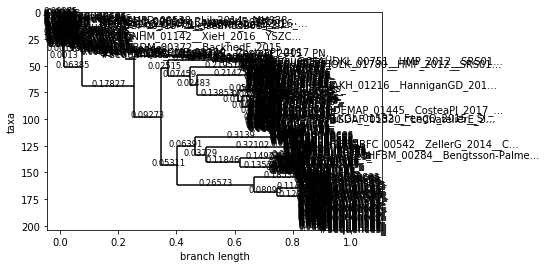

In [145]:
#Phylo.draw_ascii(tree)
tree.ladderize() 
Phylo.draw(tree, branch_labels=lambda c: c.branch_length)

In [144]:
for clade in tree.get_terminals():
    print(clade)

#sequences_
#sequences_
9340__JLINIGGI_00415__NielsenHB_2014_...
9340__DLBODGFO_01479__LeChatelierE_20...
9340__MMKNGLEG_01191__VogtmannE_2016_...
9340__AGIJFODC_00514__RaymondF_2016__...
9340__JPFFHEHC_00061__CosteaPI_2017__...
#sequences_
#sequences_
#sequences_
9340__IGOBACME_01150__CosteaPI_2017__...
9340__BNJCKHDH_00745__ZeeviD_2015__PN...
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
15299__PAHILKGL_01582__FengQ_2015__SI...
15299__EKNBGDAF_01330__LeChatelierE_2...
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
15299__NCHDEMAP_01445__CosteaPI_2017_...
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#sequences_
#s

In [170]:
# try Uclust, swarm, SUMACLUST, SortMeRNA, USEARCH for clustering?


 # used fast uclust for clustering,here are the centroids of the 99% clusters:
sequences=list(SeqIO.parse(outpath+"9aCsfalf1musi_centroid90.faa",'fasta'))
without_9710=[]
for record in sequences:
    if not record.id.startswith("9710"):
        print(record.id[:4])
        print(record.seq)
        without_9710.append(SeqRecord(record.seq, id=record.id, description=record.description))
    


8767
MEKEKNNHVWGFDIGKGSLGEAVRIGGDFKHIASVLLDPEFGEIKTAALARRQMRTRKAHKAREKWLEECLEGTGVEILKRREVGIVDGQWQLISKGDERLEREFPPSGEDVCYNSIALRCKLLLGEKLEGWQVFKALNSAIQKRGYDENIPWGEAEEKSSKKDDDDYAQKLSQYEKEKSELFESFADGEKYDFPCFFKAYKMGLWSPENPTRVEVRIDCRAQKAKSYVIARKYVEREFECLVEAAAKFFPKLKGRAKFILYGVSETPYASYYGNMRKKFGLKRGAESDWTALGQKVPRFDNRIIDKCRFIPRMNVCKIRPLNEARNEKDLLYYEVTLALKLLNLRFFRNSNIEQLTFEEFKKAFEIAAGAKYKMTKTAMKKFLKSISATALGDDYAEIEPPKESGRASFSRPAMEILKELIFSGMPPREFYGRKISEISNTDKNKGVVSSDLDFIKLMGDCPWGGIFIPDGQTYQFANAAFPDPDAQINKLIGSQNNPIVRHRLTFFFERIKFLESKYGVPDKVVLEFVRDDFMGEKEKKEMRIAMKKRAEEKMRIAKDLDEHGFKGGNLLLKMELYRKQNGICLYTGDALPLSELATLEIEHIVPRSRGGPDAQYNYVITREKTNKLKGDKTPYEWLSSDAKEWASYTDRVNACAKGLGKKRCRLLLEKDAEELVEKYTALAETAHIAKLAQKIVCMHFGFQFGGLSGTKRVFTVPGALTSRIRKFYGLDRILHNSASESENLSFEEFLKFSEDLEKKNRKNKKHHALDAMCLCFAPTGVDSRRAKLGEILPEKLRSEKAAREFFKSYLEKIMPVDVAPKKPRLEDGIYSKRIIGGKACMVKRNNLVDLAYKSGLKPVFDIPTLIKLVDKKEKGIINPQIRKMIGEFAATNPDESAWRKWCEEVRLPSKSGLGARIMRVLVYYGEADEYKDLSKDGYGAYRKGDGHKGQVIWESVDGKYYVEPVYVHASKAGVMAALNANPKKKRICGMFNSH

In [171]:
print(len(sequences))
print(len(without_9710))  # CI PIASCE!

21
19


In [ ]:
#print it pretty:
